In [1]:
import sys

In [2]:
print(sys.path)
print(sys.executable)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']
/opt/homebrew/anaconda3/envs/optimization_env_munc/bin/python


In [3]:
try:
    import sklearn
    print('scikit-learn installed, version:', sklearn.__version__)
except Exception as e:
    print('scikit-learn not importable:', e)

scikit-learn installed, version: 1.7.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [5]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [6]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [7]:
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.1, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 10}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.001, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 1000},   # krc
        "kfq":      {"min": 0.001, "max": 10},   # kx2 uM-1s-1
        "krq":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "eDF":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "Sd":     {"min": 0.1,   "max": 10}, # scalar to change on/off kinetics of dimer to cluster
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 5},   # S0 (uM)
        "R0":        {"min": 0.1, "max": 10000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.01,   "max": 100}, # X0  (/um^2)
        "Q0":       {"min": 0.01,   "max":  100}, # Q0  (/um^2)
       
         
}



    # Order in which the solver will read parameters from a candidate
    # so, e.g. candidate[0] = kfsr.
   
params_to_optimize1 = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfq","krq","eLoop","eDF","kfdd","Sd","stimUpSR","S0","R0","X0","Q0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize1, t_max=maxTime)

Gamma is 333.3333333333333


START HERE TO PERFORM CLUSTERING

In [8]:
#read in all solutions in the output file.
import pandas as pd

num=1109
fileName = f"../data/testParms_withQ_Lifetimes_{num}.txt"

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
#dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
print(dataF.loc[25])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)

log_param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness","Sd","stimUpSR"]]
print(log_param_cols)



(66156, 21)
Rank         25.000000
Fitness      -2.821100
kfsr          5.302300
krsr        129.430000
kfmm          7.990100
krmm          3.297000
kfmx          0.177810
krmx          0.097003
kfc           2.302500
krc           0.049766
kfq           4.789900
krq          17.014000
eLoop         1.480300
eDF           0.000270
kfdd          0.069858
Sd            2.545700
stimUpSR      2.672600
S0            0.038522
R0          302.430000
X0            0.020306
Q0            0.088069
Name: 25, dtype: float64
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'S0', 'R0', 'X0', 'Q0']


(-110.0, 10.0)

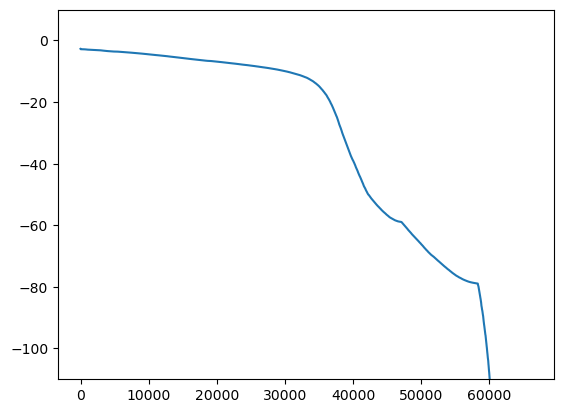

In [9]:
#plot the index vs the fitness for this dataset
plt.plot(dataF['Rank'], dataF['Fitness'])
plt.ylim([-110, 10])

In [10]:
#Only keep values of the dataset that have a fitness better than a threshold
fitness_threshold = -20
# Filter the DataFrame to only include rows with Fitness greater than the threshold
filtered_dataF = dataF[dataF['Fitness'] > fitness_threshold]
print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
print(filtered_dataF.head())
#print(filtered_dataF.tail())

Number of rows with Fitness > -20: 36652
   Rank  Fitness    kfsr    krsr    kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43  7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  129.43  7.9901  3.297  0.33726  0.041802  2.3025   
4     4  -2.7794  5.3023  129.43  7.9901  2.920  0.33726  0.065933  1.8826   

        krc  ...      krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.074260  ...  17.0140  0.88565  0.000186  0.072905  2.9623    2.6726   
1  0.071201  ...   9.2834  0.76129  0.000148  0.069858  2.5457    2.6726   
2  0.068494  ...  17.0140  0.83528  0.000270  0.069858  2.5457    2.6726   
3  0.068083  ...  22.3380  0.84900  0.000270  0.069858  2.5457    2.6726   
4  0.049766  ...  15.1310  1.48030  0.000270  0.069858  2.5457    2.6726   

         S0      R0        X0    

In [11]:
#store the very best solution from each GA run.
selected_solutions = filtered_dataF.nlargest(1, 'Fitness').copy()
print(selected_solutions)

   Rank  Fitness    kfsr    krsr    kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43  7.9901  3.297  0.33726  0.065933  2.3025   

       krc  ...     krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.07426  ...  17.014  0.88565  0.000186  0.072905  2.9623    2.6726   

         S0      R0        X0        Q0  
0  0.038522  311.83  0.020306  0.088069  

[1 rows x 21 columns]


In [12]:
#read in multiple datasets, filter for fitness threshold and concatenate before clustering.

fileNums=[8049, 7585, 9774, 9849, 4782, 9572, 8632, 4235, 6683, 3700]
for num in fileNums:
    fileName = f"../data/testParms_withQ_Lifetimes_{num}.txt"
    print("Read filename: ", fileName)
    dataF = pd.read_csv(fileName, sep=",", engine="python")
    dataF.columns = dataF.columns.str.strip()
    threshold_dataF = dataF[dataF['Fitness'] > fitness_threshold]
    print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
    tempDF = pd.concat([filtered_dataF, threshold_dataF])
    filtered_dataF=tempDF
    top1 = threshold_dataF.nlargest(1, 'Fitness').copy()
    tempTop = pd.concat([selected_solutions, top1])
    selected_solutions=tempTop
print("size of new dataset: ", filtered_dataF.shape)


Read filename:  ../data/testParms_withQ_Lifetimes_8049.txt


Number of rows with Fitness > -20: 36652
Read filename:  ../data/testParms_withQ_Lifetimes_7585.txt
Number of rows with Fitness > -20: 72206
Read filename:  ../data/testParms_withQ_Lifetimes_9774.txt
Number of rows with Fitness > -20: 108838
Read filename:  ../data/testParms_withQ_Lifetimes_9849.txt
Number of rows with Fitness > -20: 124070
Read filename:  ../data/testParms_withQ_Lifetimes_4782.txt
Number of rows with Fitness > -20: 139112
Read filename:  ../data/testParms_withQ_Lifetimes_9572.txt
Number of rows with Fitness > -20: 154289
Read filename:  ../data/testParms_withQ_Lifetimes_8632.txt
Number of rows with Fitness > -20: 167861
Read filename:  ../data/testParms_withQ_Lifetimes_4235.txt
Number of rows with Fitness > -20: 182727
Read filename:  ../data/testParms_withQ_Lifetimes_6683.txt
Number of rows with Fitness > -20: 196905
Read filename:  ../data/testParms_withQ_Lifetimes_3700.txt
Number of rows with Fitness > -20: 211478
size of new dataset:  (224552, 21)


In [13]:
print(filtered_dataF[0:10])

   Rank  Fitness    kfsr    krsr     kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43   7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  129.43   7.9901  3.297  0.33726  0.041802  2.3025   
4     4  -2.7794  5.3023  129.43   7.9901  2.920  0.33726  0.065933  1.8826   
5     5  -2.7810  5.3023  129.43   7.9901  3.297  0.22255  0.065933  2.0847   
6     6  -2.7929  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.0171   
7     7  -2.7945  5.3023  129.43   7.9901  3.297  0.33726  0.046440  1.8226   
8     8  -2.7964  5.3023  129.43  10.0000  3.297  0.33726  0.065933  1.8083   
9     9  -2.7983  5.3023  129.43   7.9901  3.297  0.33726  0.065933  1.7486   

        krc  ...      krq    eLoop       eDF      kfdd      Sd  stimUpSR  \
0  0.074260  ...  17.0140  0.88565  0.000186  0.072905

In [14]:
print("top solutions: ", selected_solutions)

top solutions:     Rank  Fitness      kfsr        krsr     kfmm      krmm       kfmx  \
0     0  -2.7322  5.302300  129.430000  7.99010  3.297000   0.337260   
0     0  -1.9188  3.582700    0.026522  2.35320  1.400400   3.571300   
0     0  -2.2956  4.314000    0.053834  4.24870  0.533930   0.368030   
0     0  -1.8155  5.316000    2.789500  1.39110  0.650370   2.236500   
0     0  -2.1046  0.264540    0.029176  1.85980  0.753330   2.859800   
0     0 -11.0889  1.051800    1.223500  0.10000  1.389100   0.020685   
0     0  -2.6895  0.222060    0.008009  0.92095  0.182650  10.000000   
0     0  -1.5810  1.082100    0.130200  0.26591  0.035394   2.151700   
0     0 -12.9077  1.634700    8.246600  0.31039  0.011796   1.681300   
0     0 -11.8664  0.004703    0.018214  0.33804  1.229700   0.010781   
0     0  -4.0603  0.355750    0.078668  4.42540  1.833300   0.360280   

         krmx       kfc       krc  ...         krq     eLoop       eDF  \
0    0.065933   2.30250  0.074260  ...   17.0

(-25.0, -1.0)

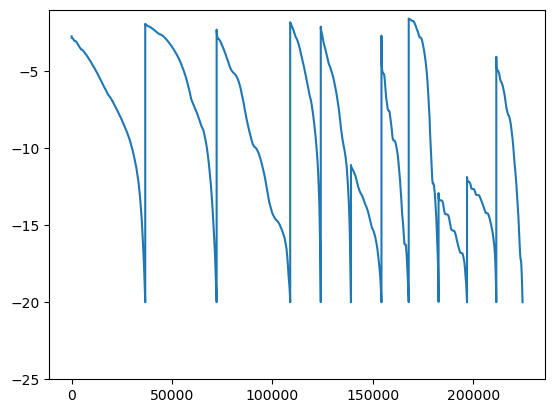

In [15]:
xVals = np.arange(0, filtered_dataF.shape[0])
plt.plot(xVals, filtered_dataF['Fitness'])
plt.ylim([-25, -1])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import math

In [17]:


#cols = ['kfmm','krmm','kfc']   # example feature columns
X = filtered_dataF[param_cols].values
print(param_cols)
print(X.shape)
print(X[1,:])
logX = np.log10(X)
print(logX[1,:])
print(10 ** logX[1,:])

['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
(224552, 19)
[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.0008e-01 6.5933e-02
 2.3025e+00 7.1201e-02 4.7899e+00 9.2834e+00 7.6129e-01 1.4806e-04
 6.9858e-02 2.5457e+00 2.6726e+00 3.8522e-02 3.0243e+02 2.0306e-02
 8.8069e-02]
[ 0.7244643   2.11203495  0.90255221  0.51811895 -0.52276295 -1.18089716
  0.36219964 -1.14751391  0.68032645  0.96770706 -0.11844987 -3.82956225
 -1.15578385  0.40580722  0.42693396 -1.41429117  2.48062487 -1.69237562
 -1.05517693]
[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.0008e-01 6.5933e-02
 2.3025e+00 7.1201e-02 4.7899e+00 9.2834e+00 7.6129e-01 1.4806e-04
 6.9858e-02 2.5457e+00 2.6726e+00 3.8522e-02 3.0243e+02 2.0306e-02
 8.8069e-02]


In [18]:
#perform clustering on the parameter sets
#first transform all data.
#Standard Scaler will evaluate the mean and variance, taking all values, subtracting means and dividing by variants.
#for all rates, they should be in log-transformed values.
scaler=StandardScaler()
Xs = scaler.fit_transform(logX)

In [19]:
nCluster = 30
kmeans = KMeans(n_clusters=nCluster, init='k-means++')

In [20]:
labels = kmeans.fit_predict(Xs)

In [21]:
centroids_scaled = kmeans.cluster_centers_             # in scaled space
centroids_original = scaler.inverse_transform(centroids_scaled)
#return the original values back to their non-log-transformed values.
centroid_10 = 10 ** centroids_original
print(centroids_original.shape)
print("first center, log10 ",centroids_original[1,:])
print("0 center, lin units ", centroid_10[0,:])
filtered_dataF['cluster'] = labels         # attach labels back to DataFrame
print("number of rows ", labels.shape)
print("labels for first 10 rows ", labels[1:10])
print(filtered_dataF[0:10])

(30, 19)
first center, log10  [ 0.62878382 -1.31652138  0.84768638 -0.45068938 -0.68847647 -0.95524778
 -0.30595582 -1.54628091 -1.74605426 -1.32271317  0.4580572  -3.30250081
 -0.65095965 -0.07386353  1.27213592 -2.27414925  0.93117216 -1.65866641
  1.85214471]
0 center, lin units  [2.25586573e-01 2.88411478e-02 1.12440832e+00 1.10437542e+00
 5.77319662e+00 1.47702139e+02 5.06026362e+00 5.39229263e-02
 6.02380338e-01 2.72865346e+01 2.04099195e+00 1.24181445e+00
 3.61898286e-01 9.25567307e+00 1.35970686e+01 3.69938192e-02
 3.10681227e+00 2.26870640e-02 6.30352768e-02]
number of rows  (224552,)
labels for first 10 rows  [18 18 18 18  2 18 18 18 18]
   Rank  Fitness    kfsr    krsr     kfmm   krmm     kfmx      krmx     kfc  \
0     0  -2.7322  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
1     1  -2.7464  5.3023  129.43   7.9901  3.297  0.30008  0.065933  2.3025   
2     2  -2.7602  5.3023  129.43   7.9901  3.297  0.33726  0.065933  2.3025   
3     3  -2.7751  5.3023  12

In [22]:
# Find the size of each cluster (number of elements per cluster)
cluster_counts = filtered_dataF['cluster'].value_counts().sort_index()
#print("Cluster sizes:")
#print(cluster_counts)

# Example: count how many elements have a particular value, e.g., cluster label 16
label_to_check = 3
count_label = (filtered_dataF['cluster'] == label_to_check).sum()
print(f"Number of elements with cluster label {label_to_check}: {count_label}")

# Calculate the mean fitness of all elements in each cluster
mean_fitness_per_cluster = filtered_dataF.groupby('cluster')['Fitness'].mean().sort_index()
#print("Mean fitness per cluster:")
#print(mean_fitness_per_cluster)
print(mean_fitness_per_cluster[label_to_check])
#print(filtered_dataF.loc[1658])
#print(filtered_dataF.loc[1659])
sorted_fitness = mean_fitness_per_cluster.sort_values(ascending=False)
sorted_clusters = sorted_fitness.index.tolist()
print("Sorted mean fitness per cluster:")
print(sorted_fitness)
print("Order of clusters by mean fitness:", sorted_clusters)
sorted_size=cluster_counts.sort_values(ascending = False)
sorted_cluster_sizes = sorted_size.index.tolist()
print("Sorted cluster sizes")
print(sorted_size)
print("order of clusters by size:",sorted_cluster_sizes)

#find the indexes of all the elements in a specific cluster
indexes_in_cluster = filtered_dataF.index[filtered_dataF['cluster'] == label_to_check].tolist()
print(f"Indexes of elements in cluster {label_to_check}: (first 10)", indexes_in_cluster[0:10])


Number of elements with cluster label 3: 7337
-3.6952296851574213
Sorted mean fitness per cluster:
cluster
3     -3.695230
13    -4.401850
25    -5.222468
17    -5.599770
2     -6.007081
8     -6.040148
24    -6.287335
18    -6.340328
4     -6.575159
20    -6.597094
9     -6.917261
28    -8.448664
14    -8.809577
0     -8.828768
11    -9.076203
21    -9.577143
23    -9.810898
10   -10.571580
1    -10.705521
5    -12.981645
6    -13.528057
27   -13.792689
29   -14.246894
7    -14.425180
12   -14.528125
26   -14.704040
15   -14.759633
16   -15.218681
22   -15.681938
19   -16.347278
Name: Fitness, dtype: float64
Order of clusters by mean fitness: [3, 13, 25, 17, 2, 8, 24, 18, 4, 20, 9, 28, 14, 0, 11, 21, 23, 10, 1, 5, 6, 27, 29, 7, 12, 26, 15, 16, 22, 19]
Sorted cluster sizes
cluster
13    24141
8     15230
24    14565
10    13577
6     10715
15    10384
18     9628
20     9059
1      9048
11     8282
25     8135
21     8122
0      7732
28     7530
19     7442
3      7337
17     7310
14  

In [23]:
centroid_df = pd.DataFrame(centroid_10, columns=param_cols)
#assign the fitness based on the mean fitness.

centroid_df['Fitness']=mean_fitness_per_cluster
#now resort the clusters by fitness values
cols = centroid_df.columns.tolist()
cols = ['Fitness'] + [col for col in cols if col != 'Fitness']
centroid_df = centroid_df[cols]

sorted_centroid = centroid_df.sort_values(by='Fitness',ascending=False)
print(sorted_centroid[0:8])

     Fitness      kfsr        krsr      kfmm      krmm      kfmx        krmx  \
3  -3.695230  1.075870    0.128847  0.273312  0.035177  2.128302    0.052908   
13 -4.401850  3.567622    0.026175  3.162335  1.272884  4.152789  139.577904   
25 -5.222468  4.277658    0.053259  7.054804  0.529348  0.361258    0.128790   
17 -5.599770  0.262221    0.028740  1.844656  0.926530  3.547811  165.272185   
2  -6.007081  5.236450  113.898034  7.823778  3.761846  0.342595    0.073369   
8  -6.040148  5.692913    2.613558  1.235336  0.839254  1.803590  364.075646   
24 -6.287335  5.238717  108.682401  7.866186  4.116171  0.348618    0.076844   
18 -6.340328  5.236031  124.707348  7.857489  3.399043  0.335591    0.067108   

         kfc       krc       kfq        krq     eLoop       eDF      kfdd  \
3   7.463436  0.673002  0.018027   0.378756  0.102815  0.006854  0.424594   
13  9.465690  0.052924  5.531176  18.238713  1.133196  9.178302  0.093323   
25  0.950935  0.021791  0.017915   0.037517  2.8

In [24]:
print("Mean of each column in log10centroid_10:")
print(np.mean(np.log10(centroid_10), axis=0))
print("Std of each column in centroid_10:")
print(np.std(np.log10(centroid_10), axis=0))


Mean of each column in log10centroid_10:
[ 0.09369384 -0.43839268  0.18648709 -0.08059433 -0.36918785  0.39408846
  0.29861291 -1.05757647 -0.45248719  0.17616718 -0.00578216 -1.52476639
 -0.73127839  0.02345966  1.03157416 -1.50944168  1.39541004 -1.64352225
 -0.12312407]
Std of each column in centroid_10:
[0.76479912 1.34655155 0.65488514 0.73296993 0.87691257 1.56085413
 0.59436447 0.44884138 1.29780189 1.29064315 0.39470025 1.63833921
 0.4169731  0.41280002 0.5504991  0.92056178 0.95582631 0.1705189
 1.32446166]


In [25]:
logData = filtered_dataF
logData[log_param_cols]=np.log10(logData[log_param_cols])
#print(filtered_dataF.head())

In [26]:
#look at the mean and variance of each parameter in the clusters. use the log-transformed values
#print(logData.head())
mean_krsr_per_cluster = logData.groupby('cluster')['krsr'].mean().sort_index()
std_krsr_per_cluster = logData.groupby('cluster')['krsr'].std().sort_index()
print("<krsr>: ", mean_krsr_per_cluster)
print("std(krsr)", std_krsr_per_cluster)
mean_per_cluster = logData.groupby('cluster')[log_param_cols].mean().sort_index()
print("Mean per cluster for all parameters:")
print(mean_per_cluster)

# Compute the std of all columns grouped by cluster
std_per_cluster = logData.groupby('cluster')[log_param_cols].std().sort_index()
print("Std per cluster for all parameters:")
print(std_per_cluster)

<krsr>:  cluster
0    -1.539987
1    -1.316521
2     2.056637
3    -0.889924
4    -1.580637
5    -0.054319
6    -1.743801
7     0.911195
8     0.417232
9    -1.111668
10   -2.113627
11    1.961919
12   -1.569859
13   -1.582124
14   -1.177671
15   -1.234086
16   -1.236221
17   -1.541520
18    2.095889
19    0.911281
20   -1.274950
21   -1.578062
22    0.043126
23    2.029231
24    2.036154
25   -1.273587
26   -1.742074
27   -0.055921
28   -0.941745
29   -0.055941
Name: krsr, dtype: float64
std(krsr) cluster
0     0.065850
1     0.074397
2     0.134530
3     0.078553
4     0.066039
5     0.075900
6     0.055317
7     0.069836
8     0.079784
9     0.059910
10    0.060003
11    0.067279
12    0.052876
13    0.067417
14    0.087132
15    0.076924
16    0.082240
17    0.068889
18    0.080843
19    0.053331
20    0.071101
21    0.063172
22    0.071782
23    0.104550
24    0.099297
25    0.066756
26    0.067534
27    0.085052
28    0.080744
29    0.069992
Name: krsr, dtype: float64
Mean per cl

In [27]:
#look for gaps in the assignments, indicating that they are not sorting by fitness.

nonconsecutive = [i for i in range(1, len(indexes_in_cluster)) if indexes_in_cluster[i] != indexes_in_cluster[i-1] + 1]
if nonconsecutive:
    print("Nonconsecutive index positions (gaps between elements):")
    for i in nonconsecutive:
        print(f"Gap between {indexes_in_cluster[i-1]} and {indexes_in_cluster[i]}")
else:
    print("All indexes are consecutive.")

Nonconsecutive index positions (gaps between elements):
Gap between 36601 and 34204
Gap between 34204 and 34265
Gap between 34265 and 35426
Gap between 35426 and 14626
Gap between 14626 and 12740
Gap between 12740 and 13540
Gap between 13540 and 0
Gap between 2392 and 2394
Gap between 2415 and 2417
Gap between 2471 and 2473
Gap between 2519 and 2521
Gap between 2552 and 2554
Gap between 2607 and 2609
Gap between 2628 and 2630
Gap between 2634 and 2636
Gap between 2638 and 2640
Gap between 2669 and 2671
Gap between 2684 and 2686
Gap between 2687 and 2689
Gap between 2816 and 2818
Gap between 2853 and 2855
Gap between 2900 and 2902
Gap between 2926 and 2928
Gap between 2973 and 2975
Gap between 2979 and 2981
Gap between 2989 and 2991
Gap between 3001 and 3003
Gap between 3007 and 3009
Gap between 3011 and 3013
Gap between 3013 and 3015
Gap between 3015 and 3019
Gap between 3020 and 3022
Gap between 3024 and 3026
Gap between 3028 and 3030
Gap between 3031 and 3035
Gap between 3036 and 303

In [28]:



# overall mean silhouette
#mean_sil = silhouette_score(Xs, labels)
#print("Mean silhouette:", mean_sil)

# per-sample silhouette values (useful for plotting / diagnostics)
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples


In [29]:
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples

In [30]:
#print(sample_sil[0:10])

PERFORM CROSS VALIDATION ON THE BEST SOLUTIONS
AND ON THE CLUSTER CENTROIDS.

In [31]:
#The clustered centroids in regular units: sorted_centroid
#the best solutions in regular units: selected_solutions
#print(selected_solutions)
#for each solution, evaluate each metric, and the error between the simulation and experiment.
#be sure to include the diffusion estimates. 
just_parms=selected_solutions[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
exp_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_metrics = pd.DataFrame([metricsD], columns = colD)

#compute tau56, densPre, denPost, stim, diffusion, percent in cluster, SS, dimer.
#same after mutation.
#add new rows:
#df.loc[len(df)] = new_row

print(exp_metrics)
print(C2A_metrics)
print(D_metrics)
print(len(just_parms))

[5.3023e+00 1.2943e+02 7.9901e+00 3.2970e+00 3.3726e-01 6.5933e-02
 2.3025e+00 7.4260e-02 6.9451e+00 1.7014e+01 8.8565e-01 1.8642e-04
 7.2905e-02 2.9623e+00 2.6726e+00 3.8522e-02 3.1183e+02 2.0306e-02
 8.8069e-02]
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 859.8879165442507. M 527.1439890003318. D 89.14996779101392. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 2749.532947956005. M 1377.784437722886. D 608.6467466170227. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 749.6306997837288. M 612.1381340808952. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMun

In [32]:
print(len(just_parms))
print(just_parms.iloc[10])

11
kfsr         0.355750
krsr         0.078668
kfmm         4.425400
krmm         1.833300
kfmx         0.360280
krmx        96.103000
kfc          4.316900
krc          0.044058
kfq          2.856100
krq          0.021062
eLoop        1.189100
eDF          1.316000
kfdd         0.893630
Sd           0.810180
stimUpSR     2.315300
S0           0.008092
R0          22.921000
X0           0.038066
Q0           0.040124
Name: 0, dtype: float64


In [33]:
#iterate over all other solutions in the just_parms array
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    exp_metrics.loc[len(exp_metrics)] = metricsWT
    C2A_metrics.loc[len(C2A_metrics)] = metricsC2A
    D_metrics.loc[len(D_metrics)] = metricsD

print(exp_metrics)
print(D_metrics)

[3.5827e+00 2.6522e-02 2.3532e+00 1.4004e+00 3.5713e+00 2.0272e+02
 1.0000e+01 3.0454e-02 6.0471e+00 1.8467e+01 1.6580e+00 9.4832e+00
 9.4320e-02 2.5469e-01 5.4903e+01 2.5754e-03 1.7202e+00 2.3255e-02
 5.4353e+01]
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 755.0761207308672. M 444.2249112409711. D 43.855732423108854. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 2103.8392520892917. M 1224.4467216867508. D 333.19647060822143. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 633.9393044664303. M 493.868030316066. D -2.2597255703422237e-32. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.000

In [34]:
#save data to files. Include the fitness values.
unique_id=1003
dir="/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots"
selected_solutions.to_csv(f"{dir}/Top11_solutions_withQ_parameters_{unique_id}.csv", index=False)
exp_metrics.to_csv(f"{dir}/Top11_solutions_withQ_WT_{unique_id}.csv")
C2A_metrics.to_csv(f"{dir}/Top11_solutions_withQ_C2A_{unique_id}.csv")
D_metrics.to_csv(f"{dir}/Top11_solutions_withQ_Diffusion_{unique_id}.csv")

# GENERATE PLOTS BASED ON A SPECIFIC CANDIDATE



# all of the below plots are based on the choice here of whichRow

In [35]:
whichRow=2
print('Fitness: ', selected_solutions['Fitness'].iloc[whichRow] )
candidate=selected_solutions[param_cols].iloc[whichRow].values
sol, solPost=model.simulate(candidate)
print(candidate)
outputRow=selected_solutions.iloc[whichRow]
#save this parameter set to file with the unique id
outputRow.to_csv(f"{dir}/ParameterSolution_{whichRow}_UsedForPlotting_{unique_id}.csv", index=False)


Fitness:  -2.2956
[4.3140e+00 5.3834e-02 4.2487e+00 5.3393e-01 3.6803e-01 6.6286e-02
 1.3607e+00 2.1555e-02 1.8137e-02 3.7562e-02 2.8266e+00 5.1271e-04
 1.3557e-01 8.4171e-01 1.8945e+01 2.6940e-03 2.8242e+00 2.1563e-02
 8.9618e+01]


In [36]:
print(D_metrics.iloc[whichRow])
print(exp_metrics.iloc[whichRow])
print(C2A_metrics.iloc[whichRow])

D           0.048643
Dpost       0.041833
C2AD        0.065689
C2ADpost    0.075259
Name: 2, dtype: float64
tau56        1.940533e+01
tau56Post    1.940513e+01
densPre      2.147320e-02
densPost     2.152615e-02
stimFact     2.804829e+00
percClust    1.431625e-01
percCPost    5.116728e-02
percDimer    3.620489e-01
percDPost    6.199109e-01
SSval        7.208391e-07
SSvalPost    4.571377e-08
Name: 2, dtype: float64
C2Atau56        1.641299e+01
C2Atau56Post    1.641299e+01
C2AdensPre      1.195280e-02
C2AdensPost     1.879241e-02
C2AstimFact     3.256495e+00
C2ApercClust    1.101135e-01
C2ApercCPost    5.316221e-02
C2ApercDimer    0.000000e+00
C2ApercDPost    0.000000e+00
C2ASSval        2.125228e-06
C2ASSvalPost    7.198700e-12
Name: 2, dtype: float64


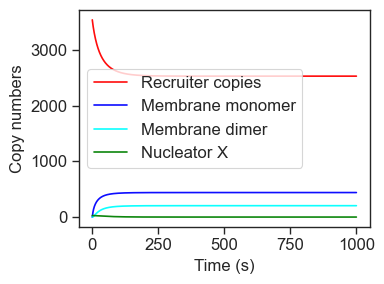

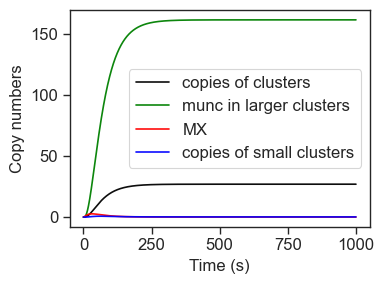

<Figure size 640x480 with 0 Axes>

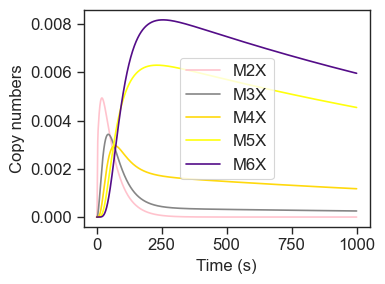

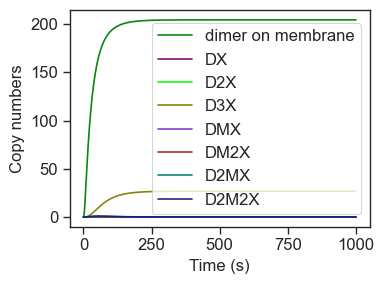

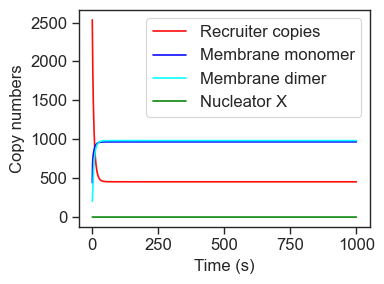

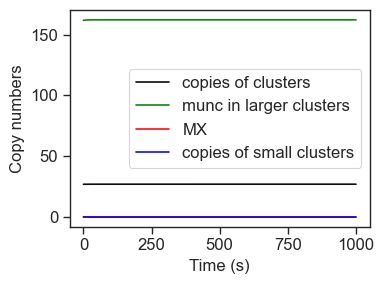

<Figure size 640x480 with 0 Axes>

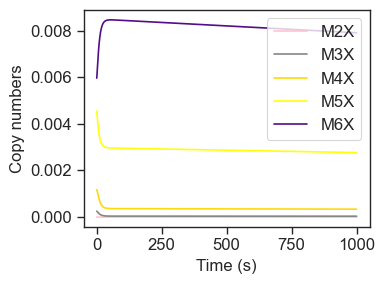

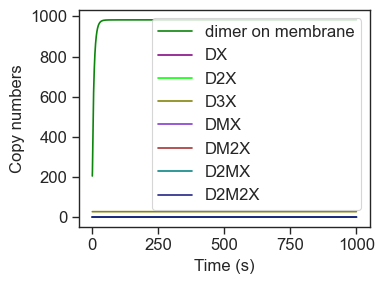

In [37]:
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
#m
#m

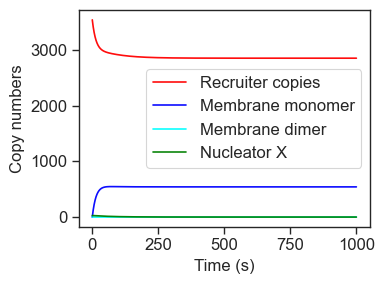

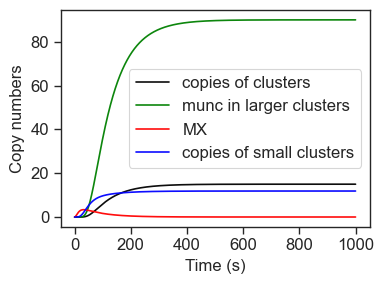

<Figure size 640x480 with 0 Axes>

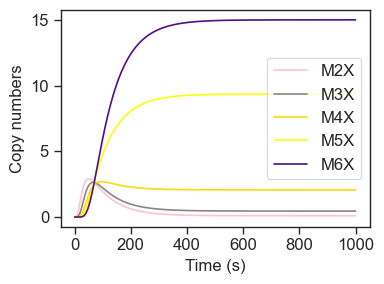

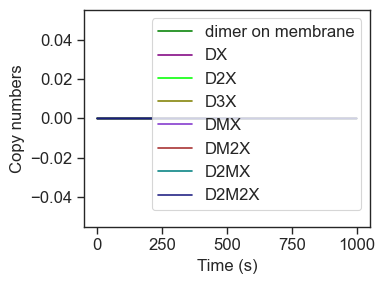

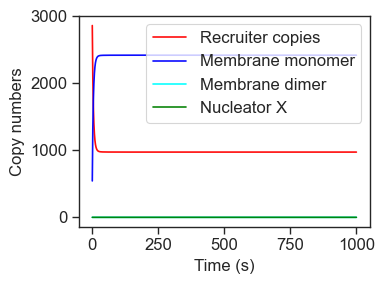

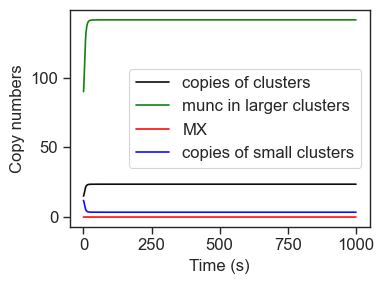

<Figure size 640x480 with 0 Axes>

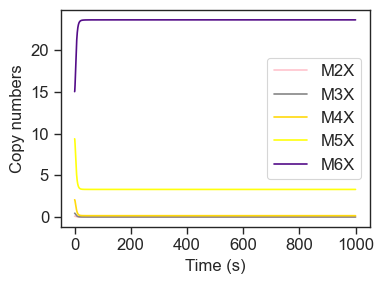

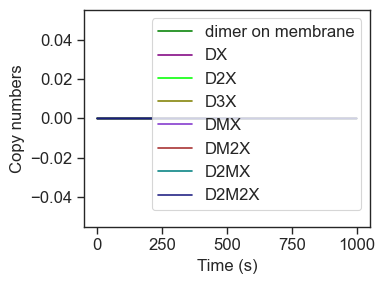

In [38]:
candidate_dc2a=list(candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mut, mutPost = model.simulate(candidate_dc2a)
       
model.plot_freespecies_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
#m
model.plot_freespecies_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
#m

In [39]:
print(model.timePoints[1])

0.5


# Now generate plots and save to file for the paper

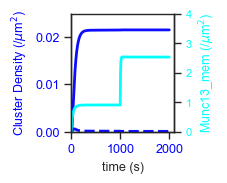

In [ ]:
model.plot_time_resolved_density(sol, solPost,f"WT_{unique_id}_{whichRow}")

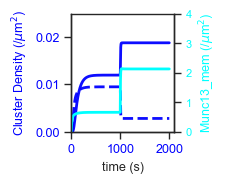

In [ ]:
#Plot the same thing for the C2A mutant.
model.plot_time_resolved_density(mut, mutPost, f"C2A_{unique_id}_{whichRow}")

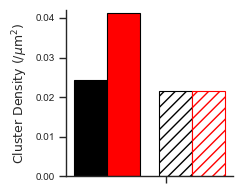

In [ ]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"WT_{unique_id}_{whichRow}", whichExp='WT')

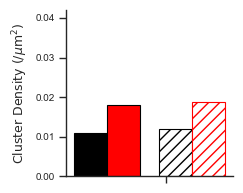

In [ ]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(mut, mutPost, f"C2A_{unique_id}_{whichRow}", whichExp='C2A')

In [44]:
print(D_metrics.iloc[whichRow])

D           0.048643
Dpost       0.041833
C2AD        0.065689
C2ADpost    0.075259
Name: 2, dtype: float64


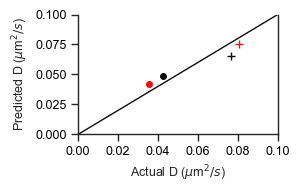

In [ ]:
#make a plot that shows actual and predicted diffusion constants for
model.plot_diffusion_vs_exp(D_metrics, whichRow, fileStr=f"{unique_id}_")


sizes pre stim, and sum:  [np.float64(0.4943115073584666), np.float64(0.36204889567931553), np.float64(0.14316249057857466)]
sizes POST stim, and sum:  [np.float64(0.32885045621520564), np.float64(0.6199109040237843), np.float64(0.05116727980183801)]


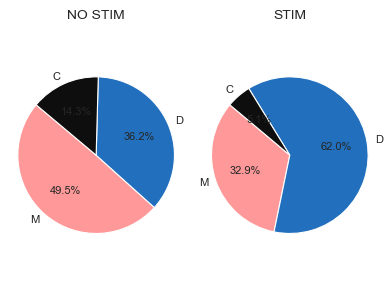

sizes pre stim, and sum:  [np.float64(0.8205754308396598), np.float64(0.0), np.float64(0.11011353862842074)]
sizes POST stim, and sum:  [np.float64(0.9403744568755369), np.float64(0.0), np.float64(0.0531622072673176)]


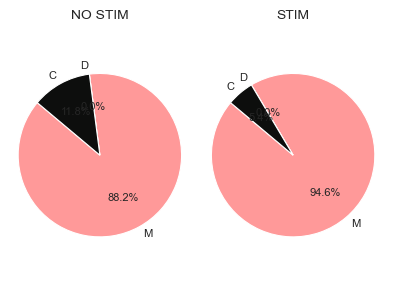

In [ ]:
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"WT_{unique_id}_{whichRow}")
#create pie charts of the mutant.
model.pie_charts(mut, mutPost, [4,3], f"C2A_{unique_id}_{whichRow}")

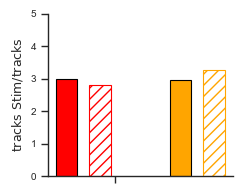

In [ ]:
#plot the increase in tracks, experiment vs simulation
model.plot_track_increase_vs_exp(sol, solPost, mut, mutPost, fileStr=f"{unique_id}_row_{whichRow}", figsize=(2.5, 2))
       

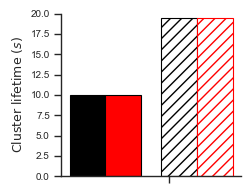

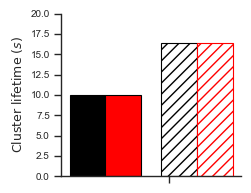

In [ ]:
#create a plot comparing the lifetimes before and after stimulation
model.plot_lifetime_vs_exp(candidate, sol, solPost, f"WT_{unique_id}_{whichRow}")
#create the plot fot eh C2A mutant
model.plot_lifetime_vs_exp(candidate_dc2a, mut, mutPost, f"C2A_{unique_id}_{whichRow}")

# For the cluster centroids, also evaluate all the key metrics and save to file

In [49]:
#Set up the dataframe with the first solution results
just_parms=sorted_centroid[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
clus_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2Aclus_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
Dclus_metrics = pd.DataFrame([metricsD], columns = colD)

[1.07587005e+00 1.28847468e-01 2.73311781e-01 3.51774593e-02
 2.12830155e+00 5.29079368e-02 7.46343614e+00 6.73002024e-01
 1.80265628e-02 3.78755505e-01 1.02815083e-01 6.85350053e-03
 4.24593516e-01 1.80249788e+00 1.45804127e+01 3.49598661e-02
 2.02393107e+00 2.19859776e-02 1.52845621e-01]
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 799.8510103369408. M 363.163457932669. D 135.5287559232751. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 2275.899369209766. M 798.7807133385123. D 655.6363764374436. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 654.1559135642458. M 547.6177116721746. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.000892

In [50]:
#Now iterate over all other solutions in the sorted_centroid array
#add them to the dataframe.
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    clus_metrics.loc[len(clus_metrics)] = metricsWT
    C2Aclus_metrics.loc[len(C2Aclus_metrics)] = metricsC2A
    Dclus_metrics.loc[len(Dclus_metrics)] = metricsD

print(clus_metrics)
print(Dclus_metrics)

[3.56762152e+00 2.61748837e-02 3.16233539e+00 1.27288358e+00
 4.15278894e+00 1.39577904e+02 9.46568999e+00 5.29244363e-02
 5.53117602e+00 1.82387130e+01 1.13319584e+00 9.17830154e+00
 9.33233534e-02 2.52120597e-01 6.97642079e+01 2.55250800e-03
 1.47393918e+00 2.28607089e-02 5.37514303e+01]
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 680.6670194803927. M 374.33811650230183. D 46.042567304518805. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 1831.0480159278447. M 985.2634090135595. D 318.9611697159198. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 562.4398883298869. M 422.63482625369994. D -5.414332784939774e-32. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.00093023255

In [51]:
#print these solutions to file
sorted_centroid.to_csv(f"{dir}/Centroid_solutions_withQ_parameters_{unique_id}.csv", index=False)
clus_metrics.to_csv(f"{dir}/Centroid_solutions_withQ_WT_{unique_id}.csv")
C2Aclus_metrics.to_csv(f"{dir}/Centroid_solutions_withQ_C2A_{unique_id}.csv")
Dclus_metrics.to_csv(f"{dir}/Centroid_solutions_withQ_Diffusion_{unique_id}.csv")

In [52]:
#filter solutions that have the correct trend with diffusion.
storeID=[]
for idx, row in D_metrics.iterrows():
    #print(f"Row {idx}: {row.to_dict()}")
    # You can access individual columns like row['D'], row['Dpost'], etc.
    ratio=row['D']/row['Dpost']
    
    if ratio>1.1:
        storeID.append(idx)

storeID=np.array(storeID)
print(storeID)
subset=selected_solutions.iloc[storeID]
subset.to_csv(f"{dir}/parameter_solutions_Dslows_{unique_id}.csv", index=False)


[2 5 9]


Total solutions loaded: 11
Using top 100% by Fitness -> 11 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity.png
Total solutions loaded: 3
Using top 100% by Fitness -> 3 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_Dslows.png


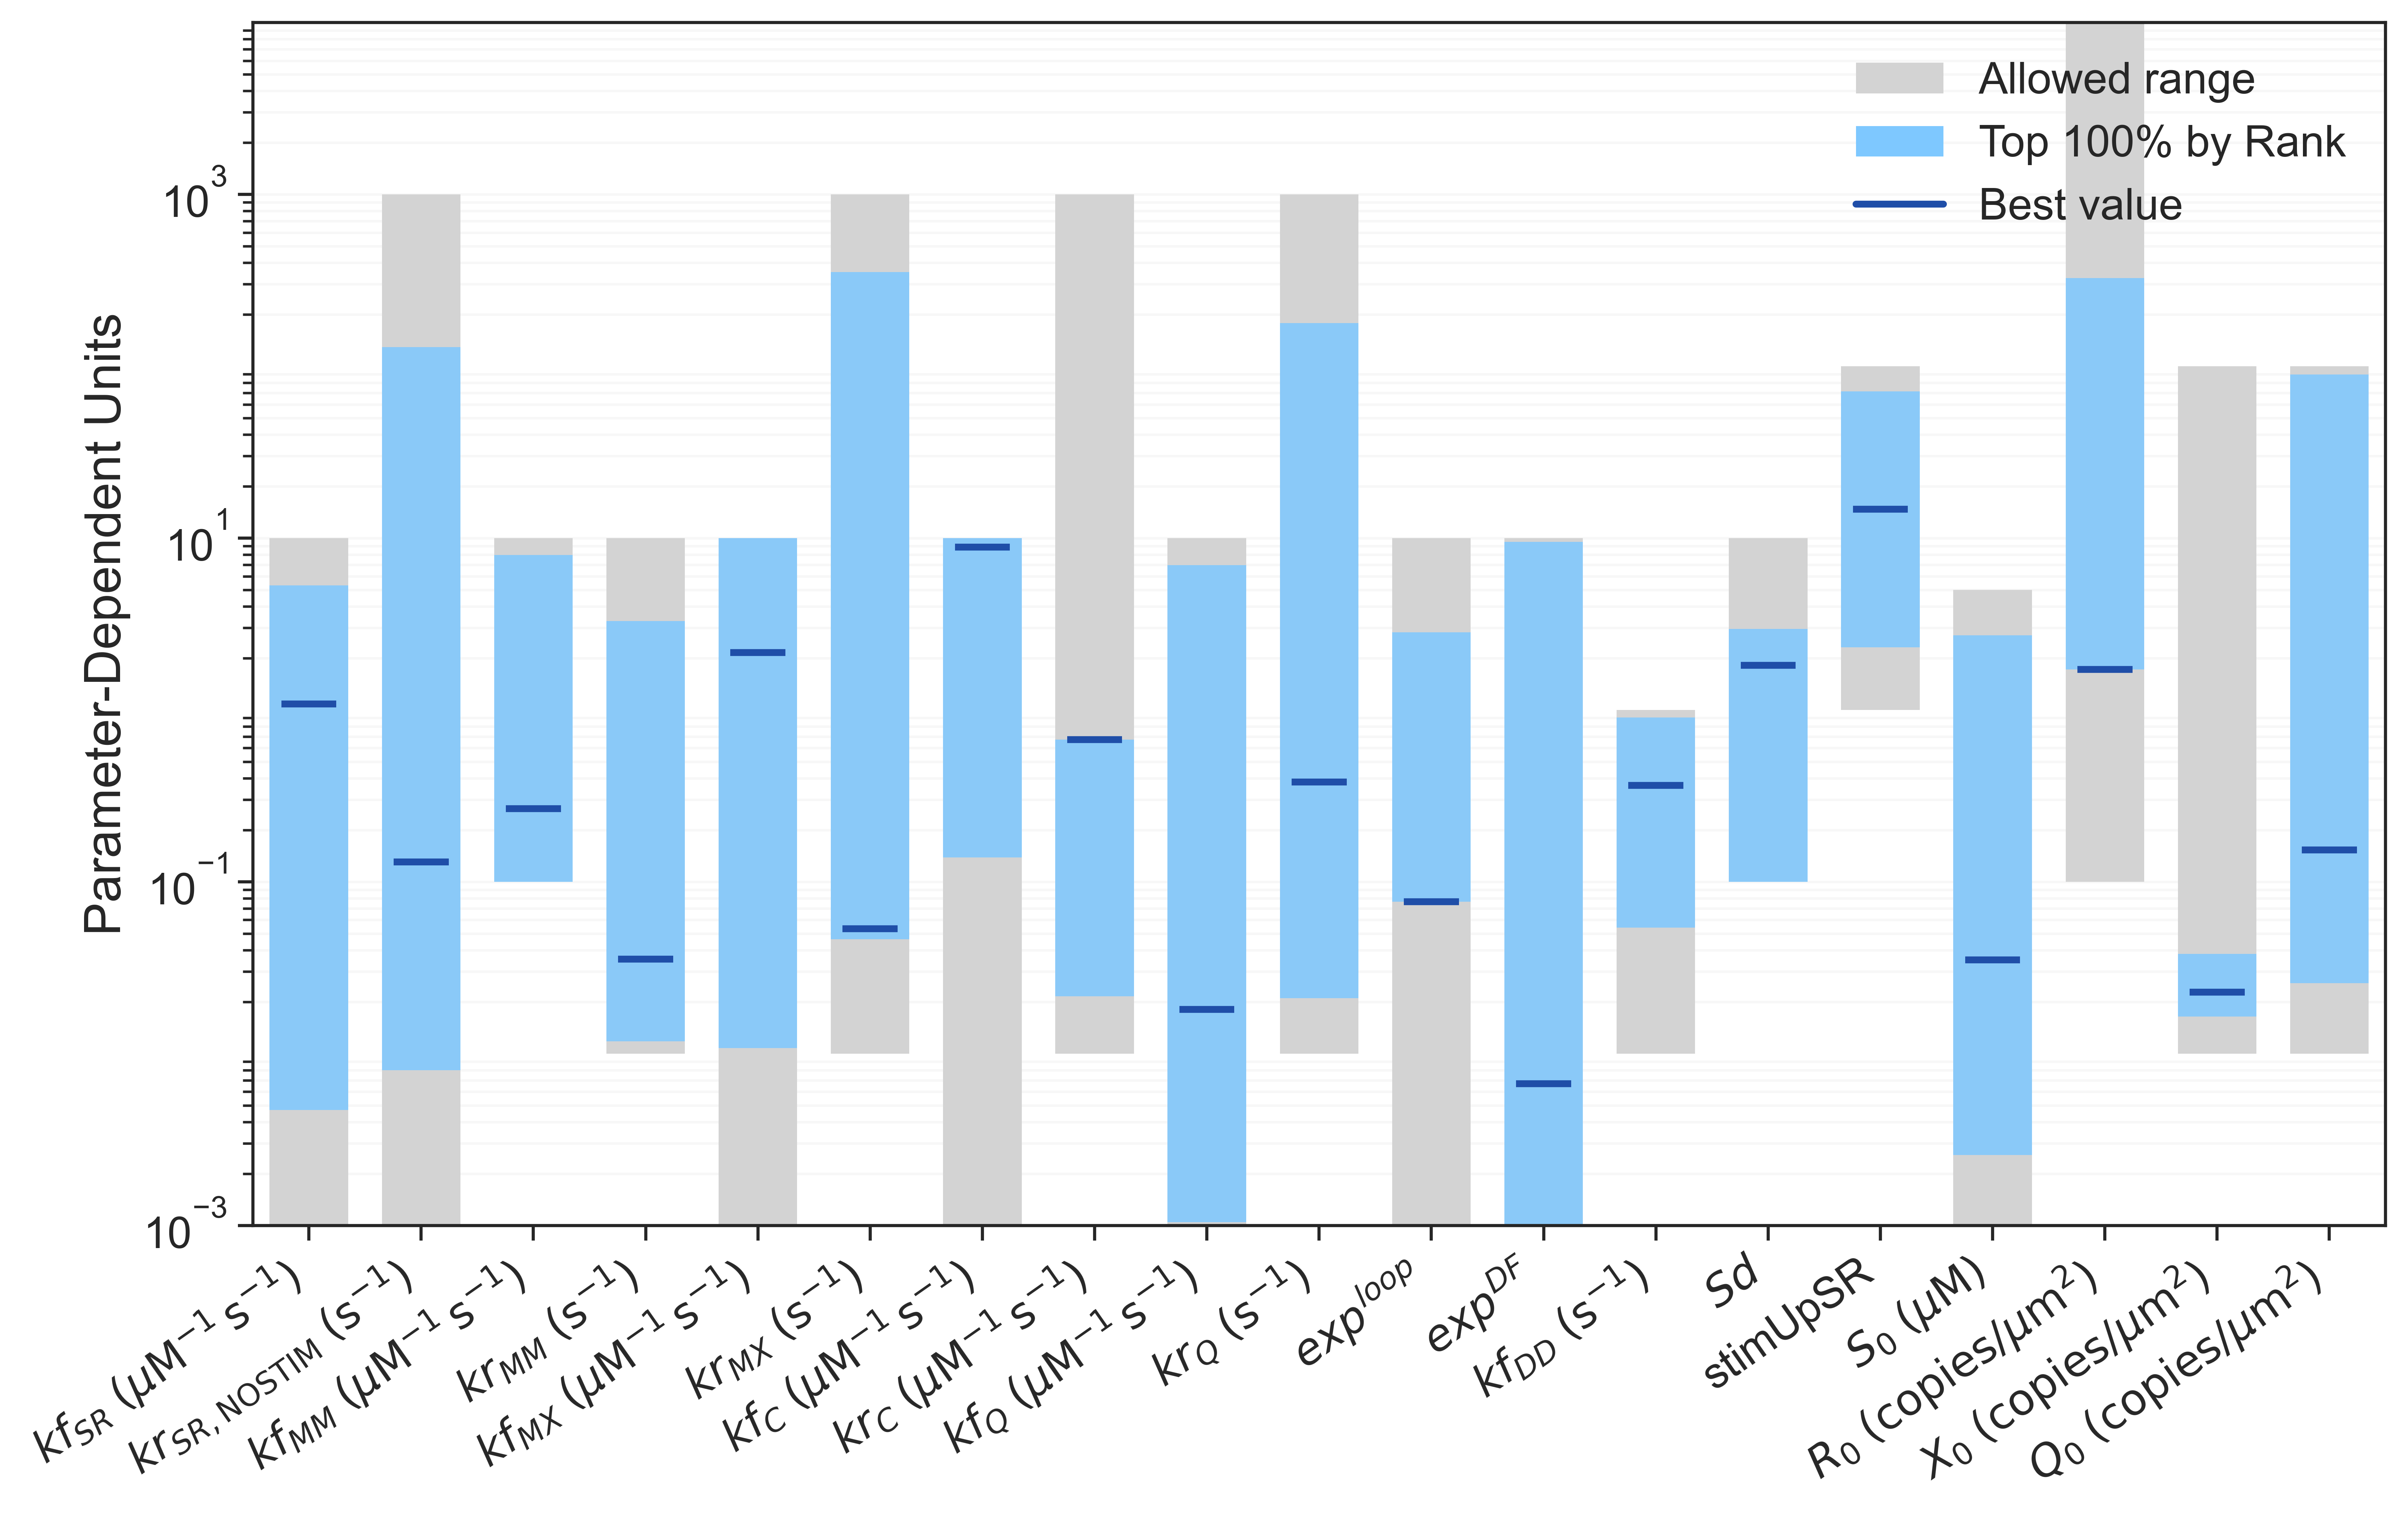

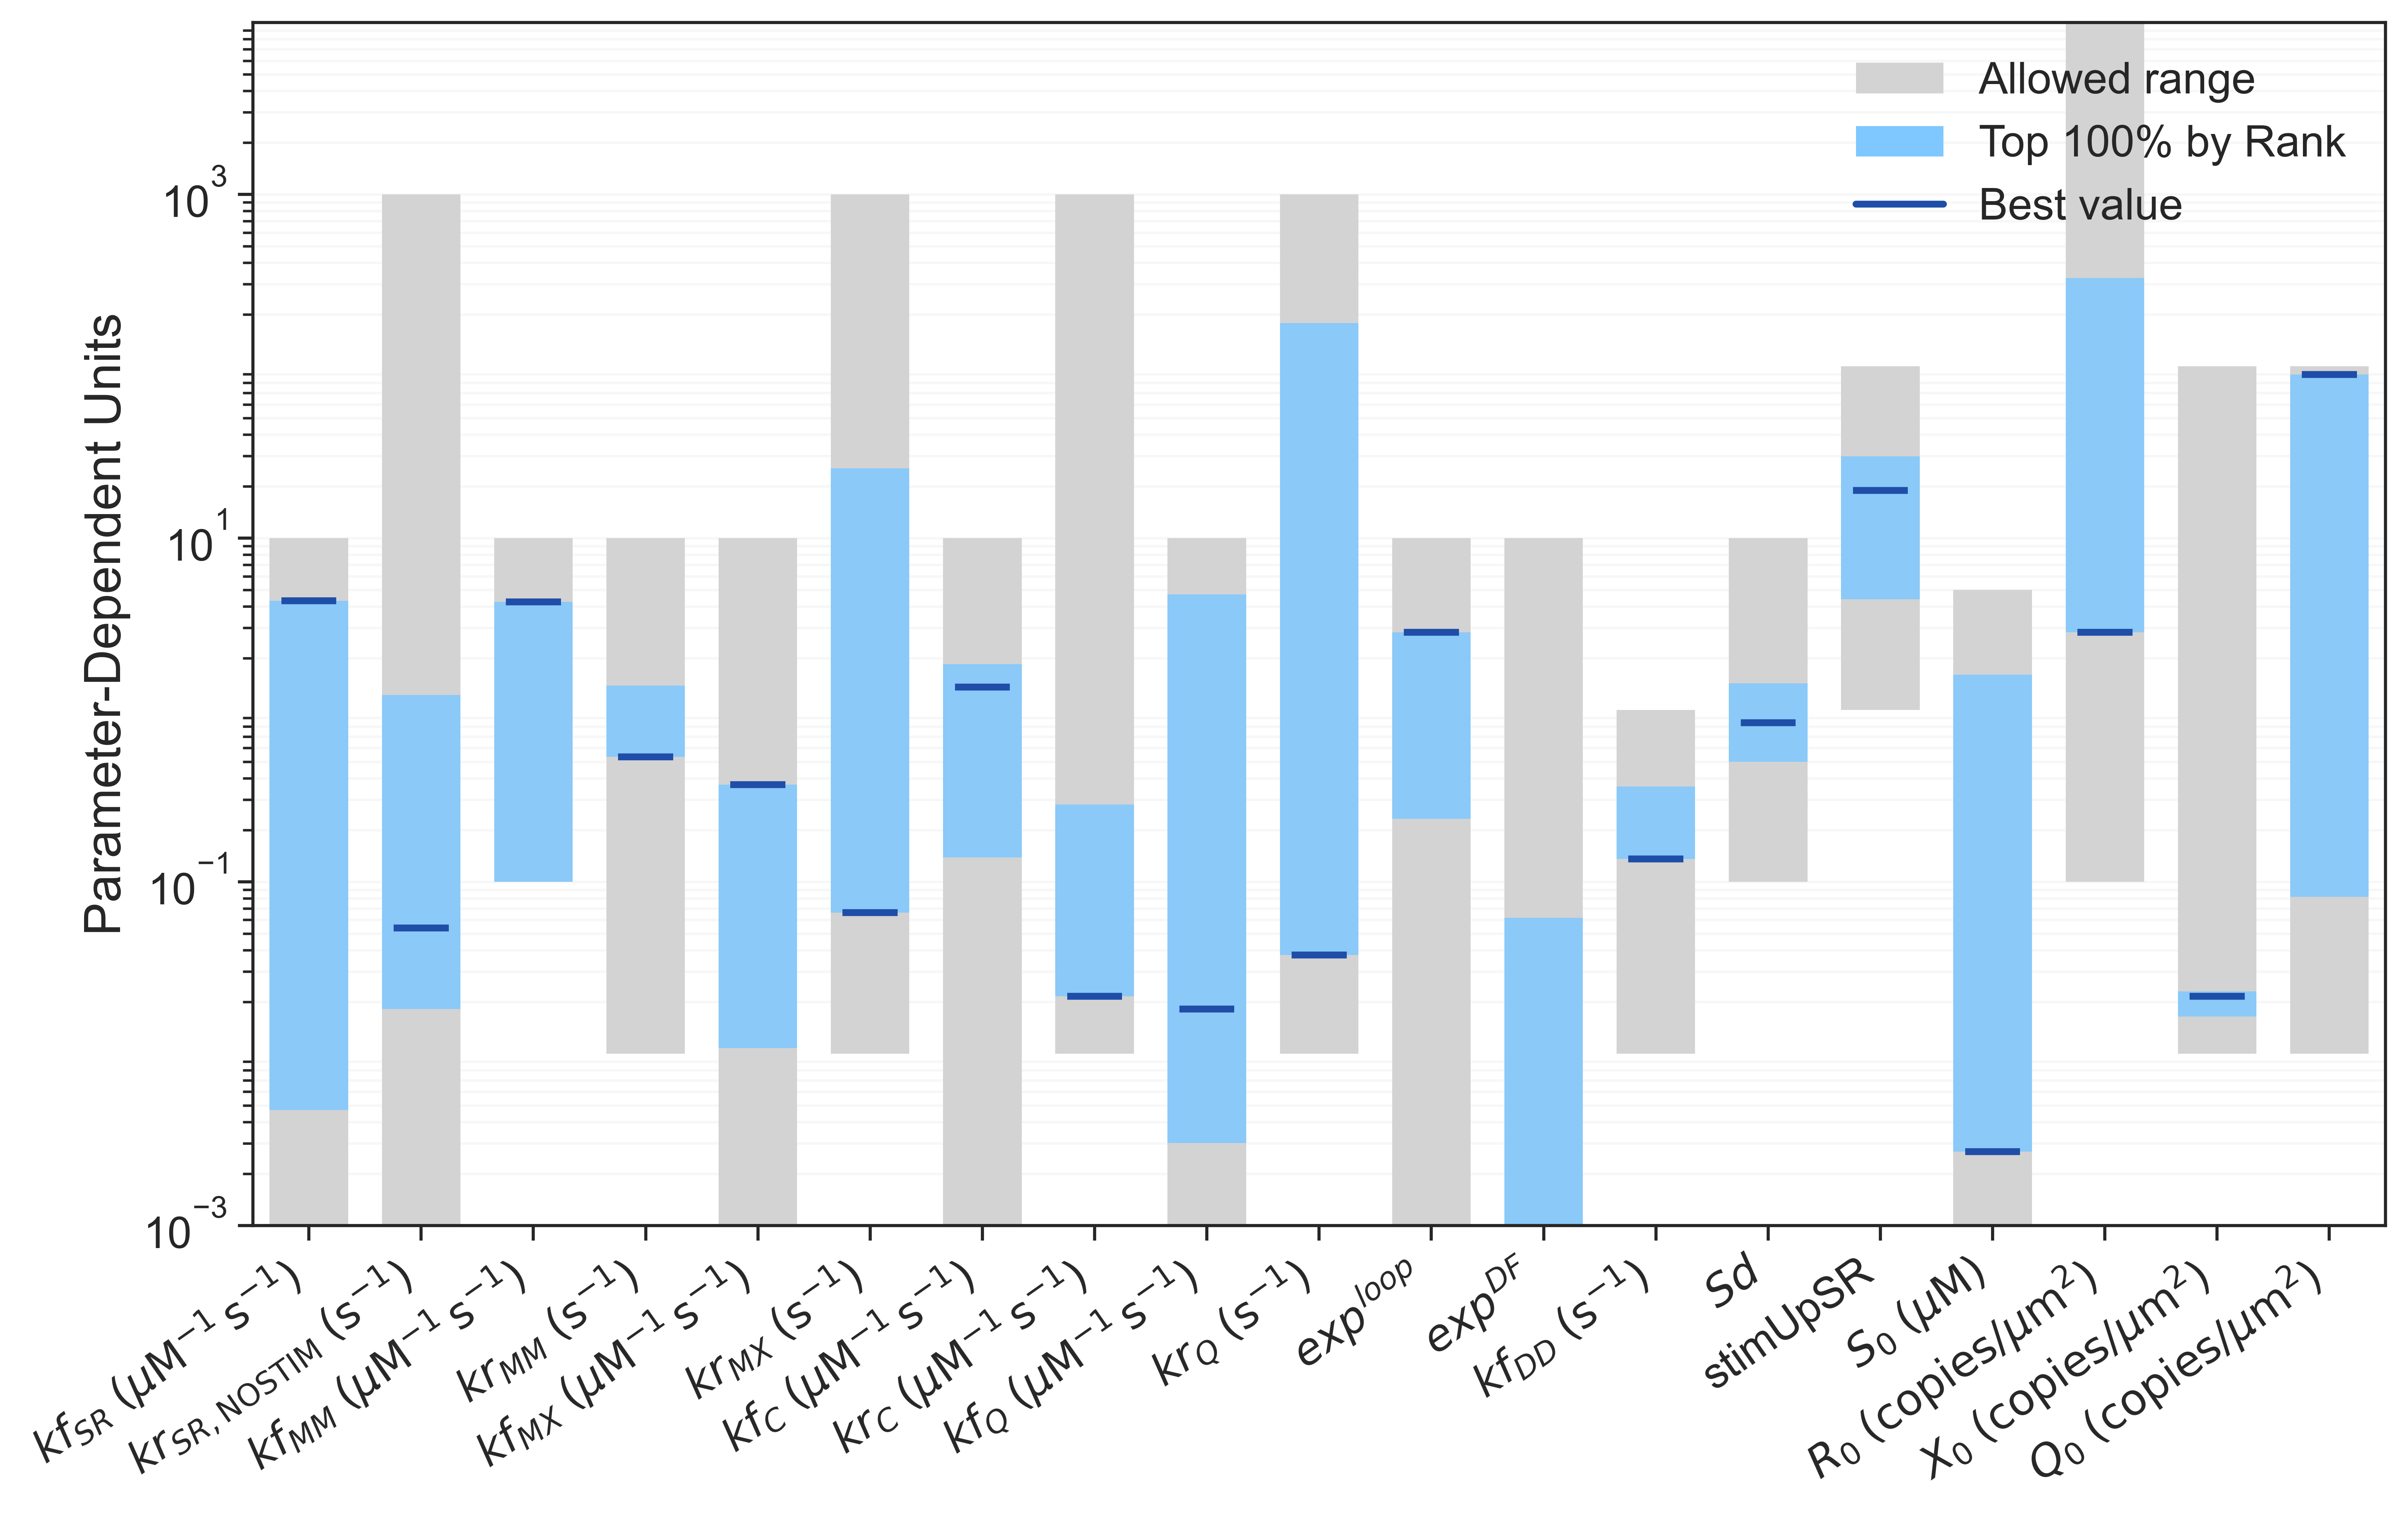

In [53]:
#plot paramter ranges for top solutions, for clusters, 
#and also just for solutions where mobility is good
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=100, save_path=f"{dir}/sensitivity.png",inputFile=f"{dir}/Top11_solutions_withQ_parameters_{unique_id}.csv")
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=100, save_path=f"{dir}/sensitivity_Dslows.png",inputFile=f"{dir}/parameter_solutions_Dslows_{unique_id}.csv")


In [54]:
#filter solutions that have the correct trend with diffusion.
storeID2=[]
for idx, row in Dclus_metrics.iterrows():
    #print(f"Row {idx}: {row.to_dict()}")
    # You can access individual columns like row['D'], row['Dpost'], etc.
    ratio=row['D']/row['Dpost']
    
    if ratio>1.1:
        storeID2.append(idx)

storeID2=np.array(storeID2)
print(storeID2)
subset=sorted_centroid.iloc[storeID2]
subset.to_csv(f"{dir}/centroid_parameter_solutions_Dslows_{unique_id}.csv", index=False)


[ 2  9 12 16 19 20 21 22 25 28]


Total solutions loaded: 30
Using top 100% by Fitness -> 30 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_centroid.png
Total solutions loaded: 10
Using top 100% by Fitness -> 10 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_centroid_Dslows.png


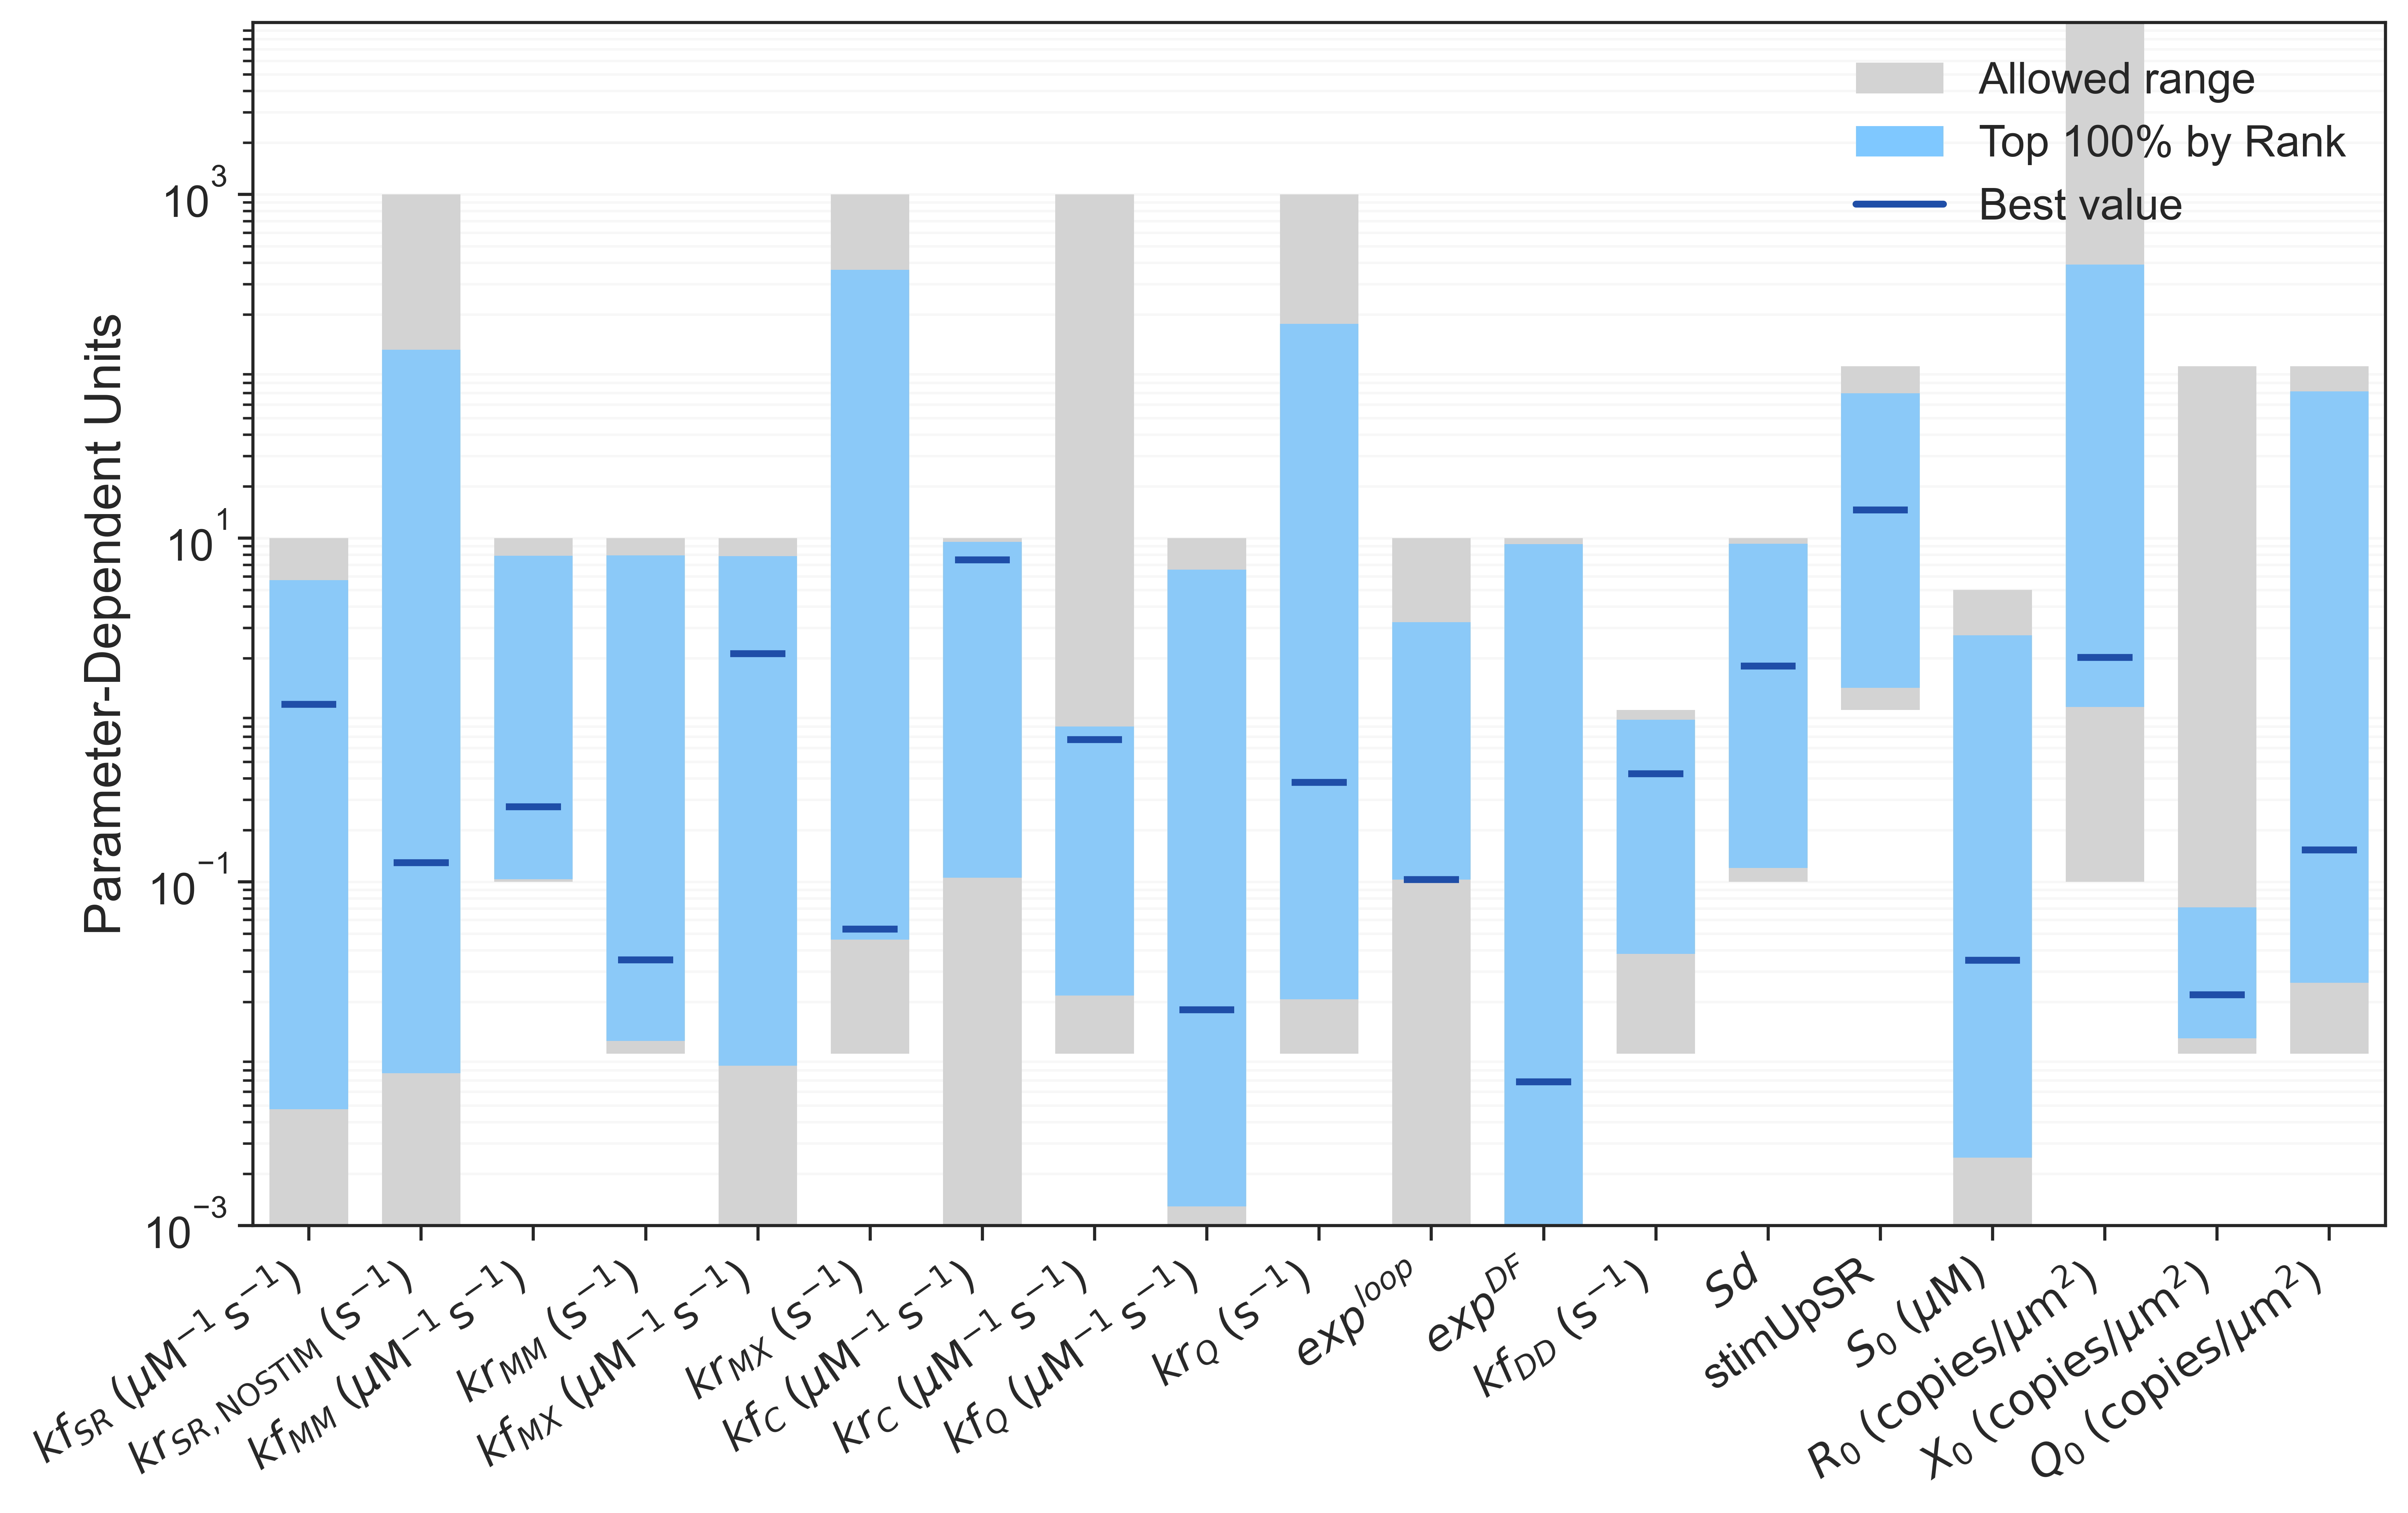

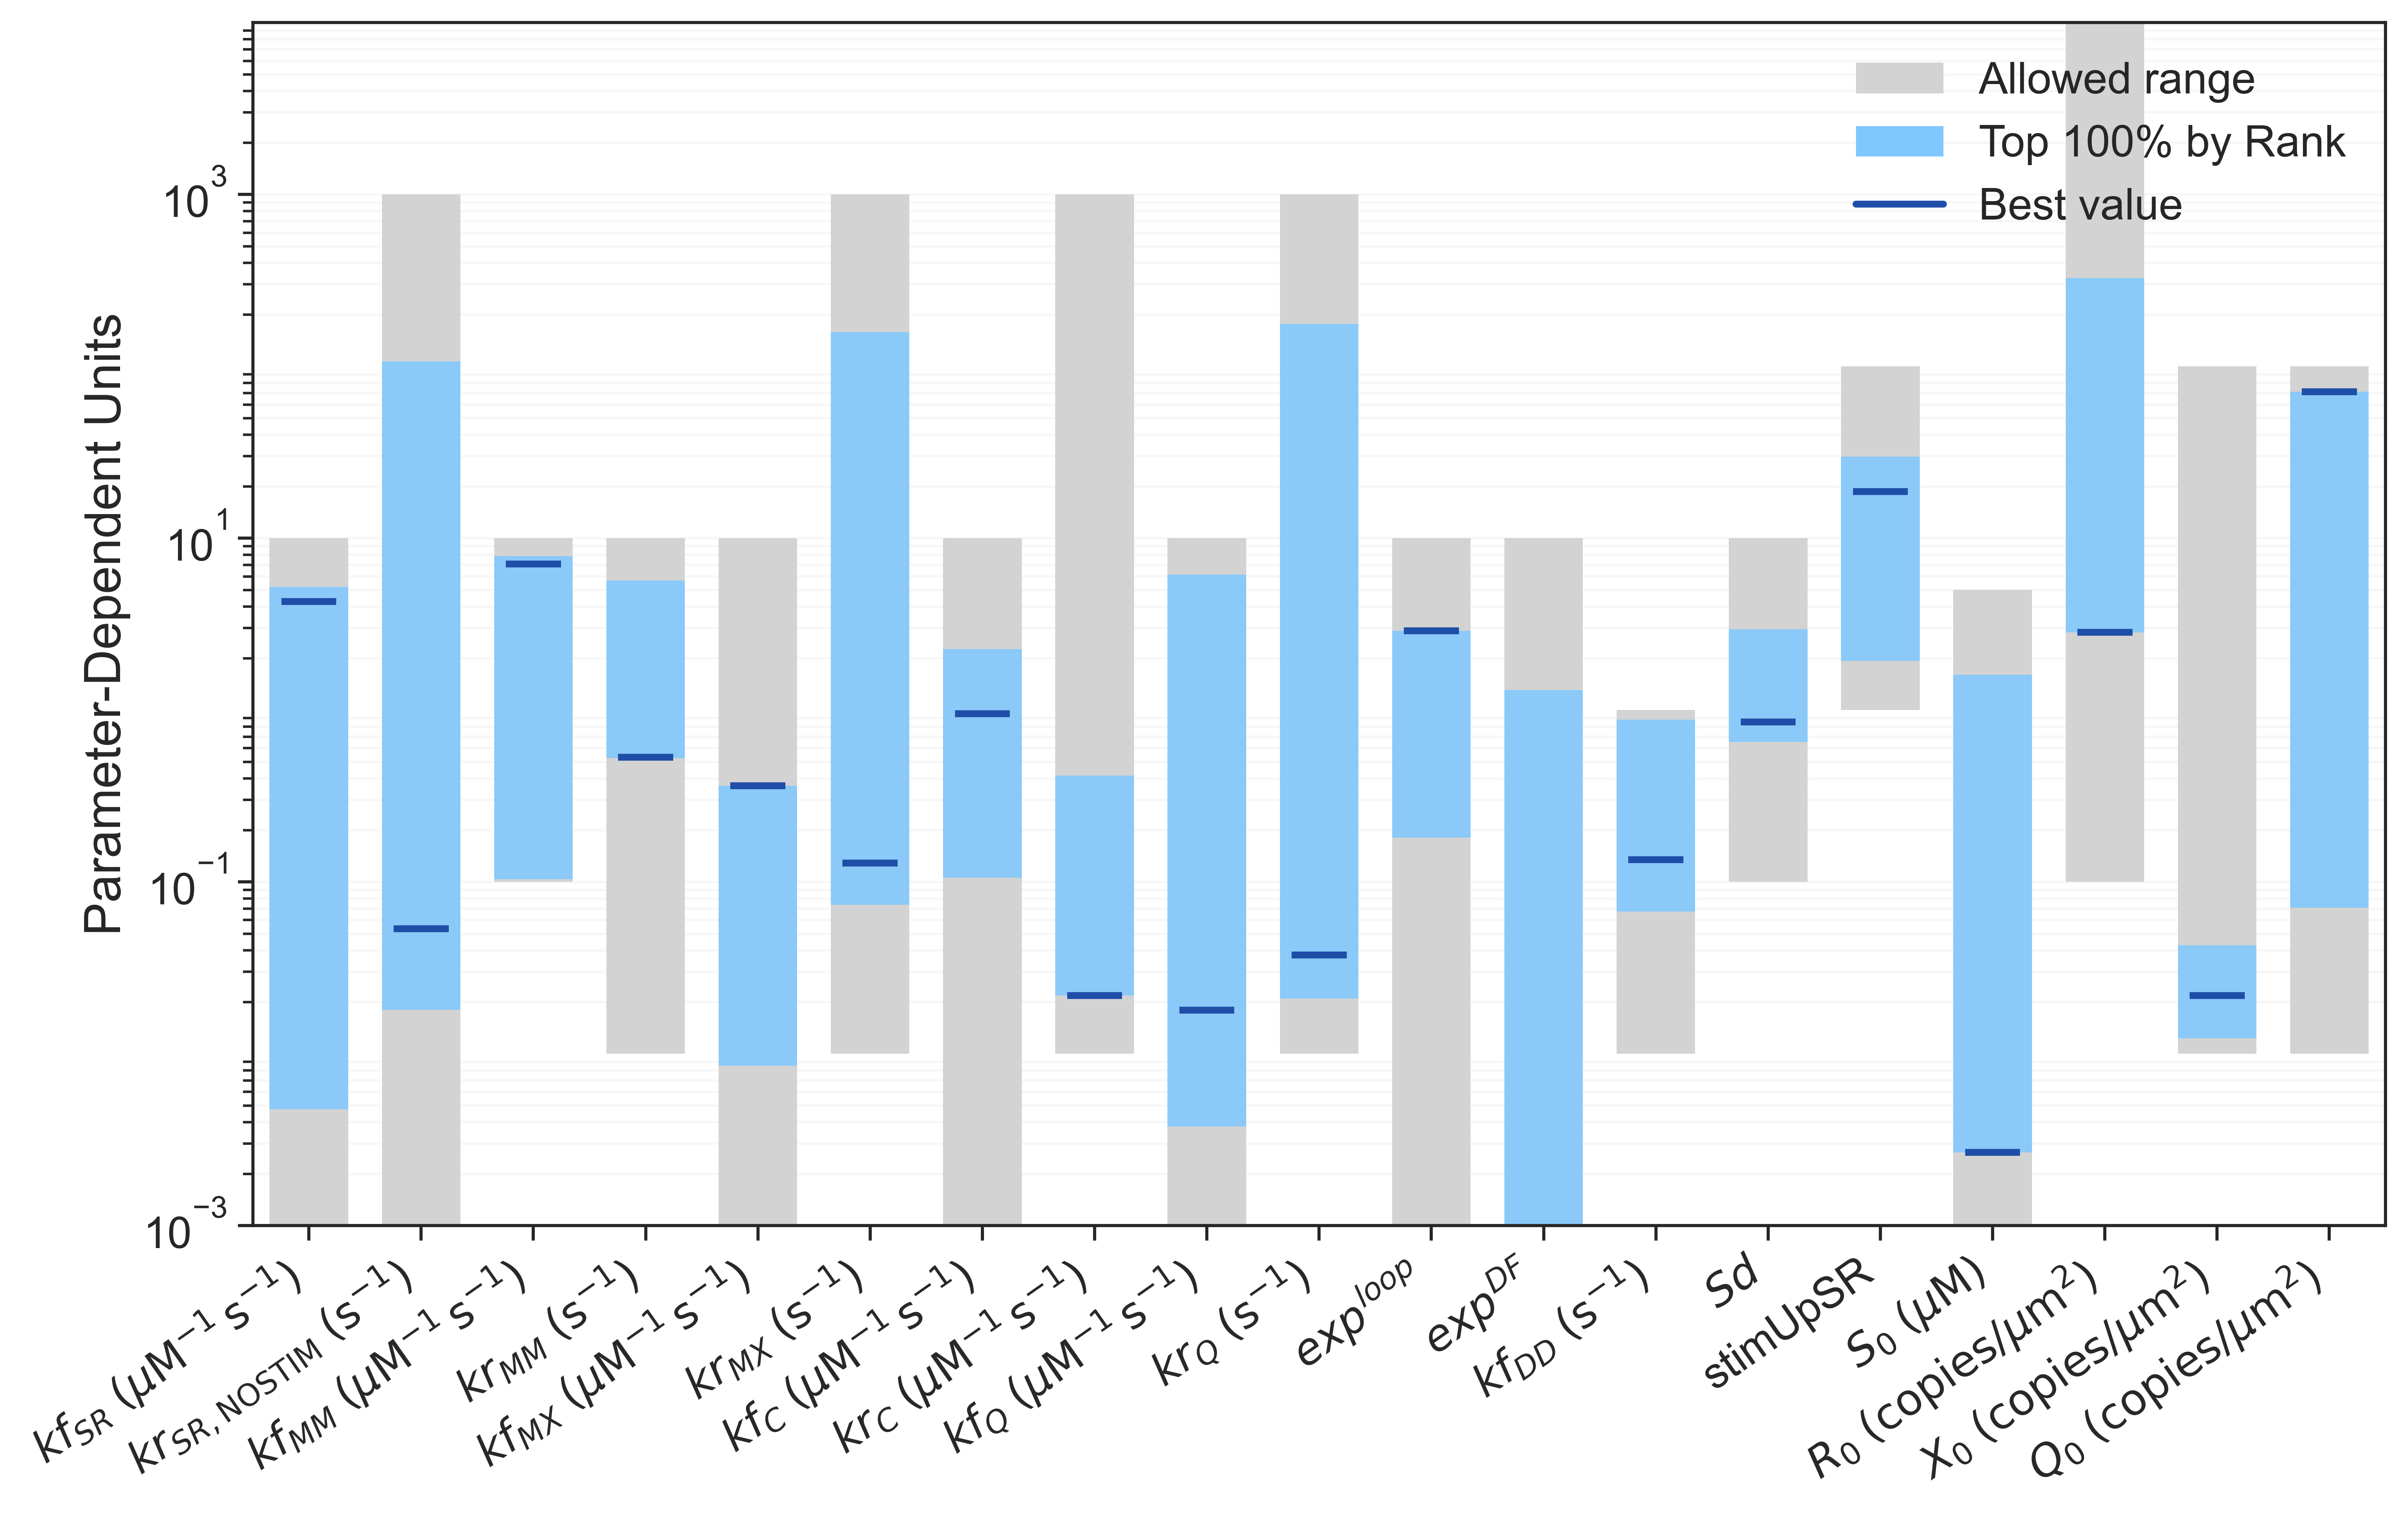

In [ ]:
#now create the sensitivity plots based on all the clusters
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=100, save_path=f"{dir}/sensitivity_centroid_{unique_id}.png",inputFile=f"{dir}/Centroid_solutions_withQ_parameters_{unique_id}.csv")
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=100, save_path=f"{dir}/sensitivity_centroid_{unique_id}_Dslows.png",inputFile=f"{dir}/centroid_parameter_solutions_Dslows_{unique_id}.csv")


# distribution of sampled KD values from top 11

Total solutions loaded: 11
Using top 100% by Fitness -> 11 solutions.
p:  kDsr
best_row        kDsr      kDmm      kDmx      kDc       kDq
0  0.120322  0.133105  0.024794  0.07597  21.03843
p:  kDmm
best_row        kDsr      kDmm      kDmx      kDc       kDq
0  0.120322  0.133105  0.024794  0.07597  21.03843
p:  kDmx
best_row        kDsr      kDmm      kDmx      kDc       kDq
0  0.120322  0.133105  0.024794  0.07597  21.03843
p:  kDc
best_row        kDsr      kDmm      kDmx      kDc       kDq
0  0.120322  0.133105  0.024794  0.07597  21.03843
p:  kDq
best_row        kDsr      kDmm      kDmx      kDc       kDq
0  0.120322  0.133105  0.024794  0.07597  21.03843


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Top11.png
Total solutions loaded: 3
Using top 100% by Fitness -> 3 solutions.
p:  kDsr
best_row        kDsr      kDmm     kDmx       kDc       kDq
0  0.012479  0.125669  0.18011  0.015841  2.071015
p:  kDmm
best_row        kDsr      kDmm     kDmx       kDc       kDq
0  0.012479  0.125669  0.18011  0.015841  2.071015
p:  kDmx
best_row        kDsr      kDmm     kDmx       kDc       kDq
0  0.012479  0.125669  0.18011  0.015841  2.071015
p:  kDc
best_row        kDsr      kDmm     kDmx       kDc       kDq
0  0.012479  0.125669  0.18011  0.015841  2.071015
p:  kDq
best_row        kDsr      kDmm     kDmx       kDc       kDq
0  0.012479  0.125669  0.18011  0.015841  2.071015


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Top11_Dslows.png


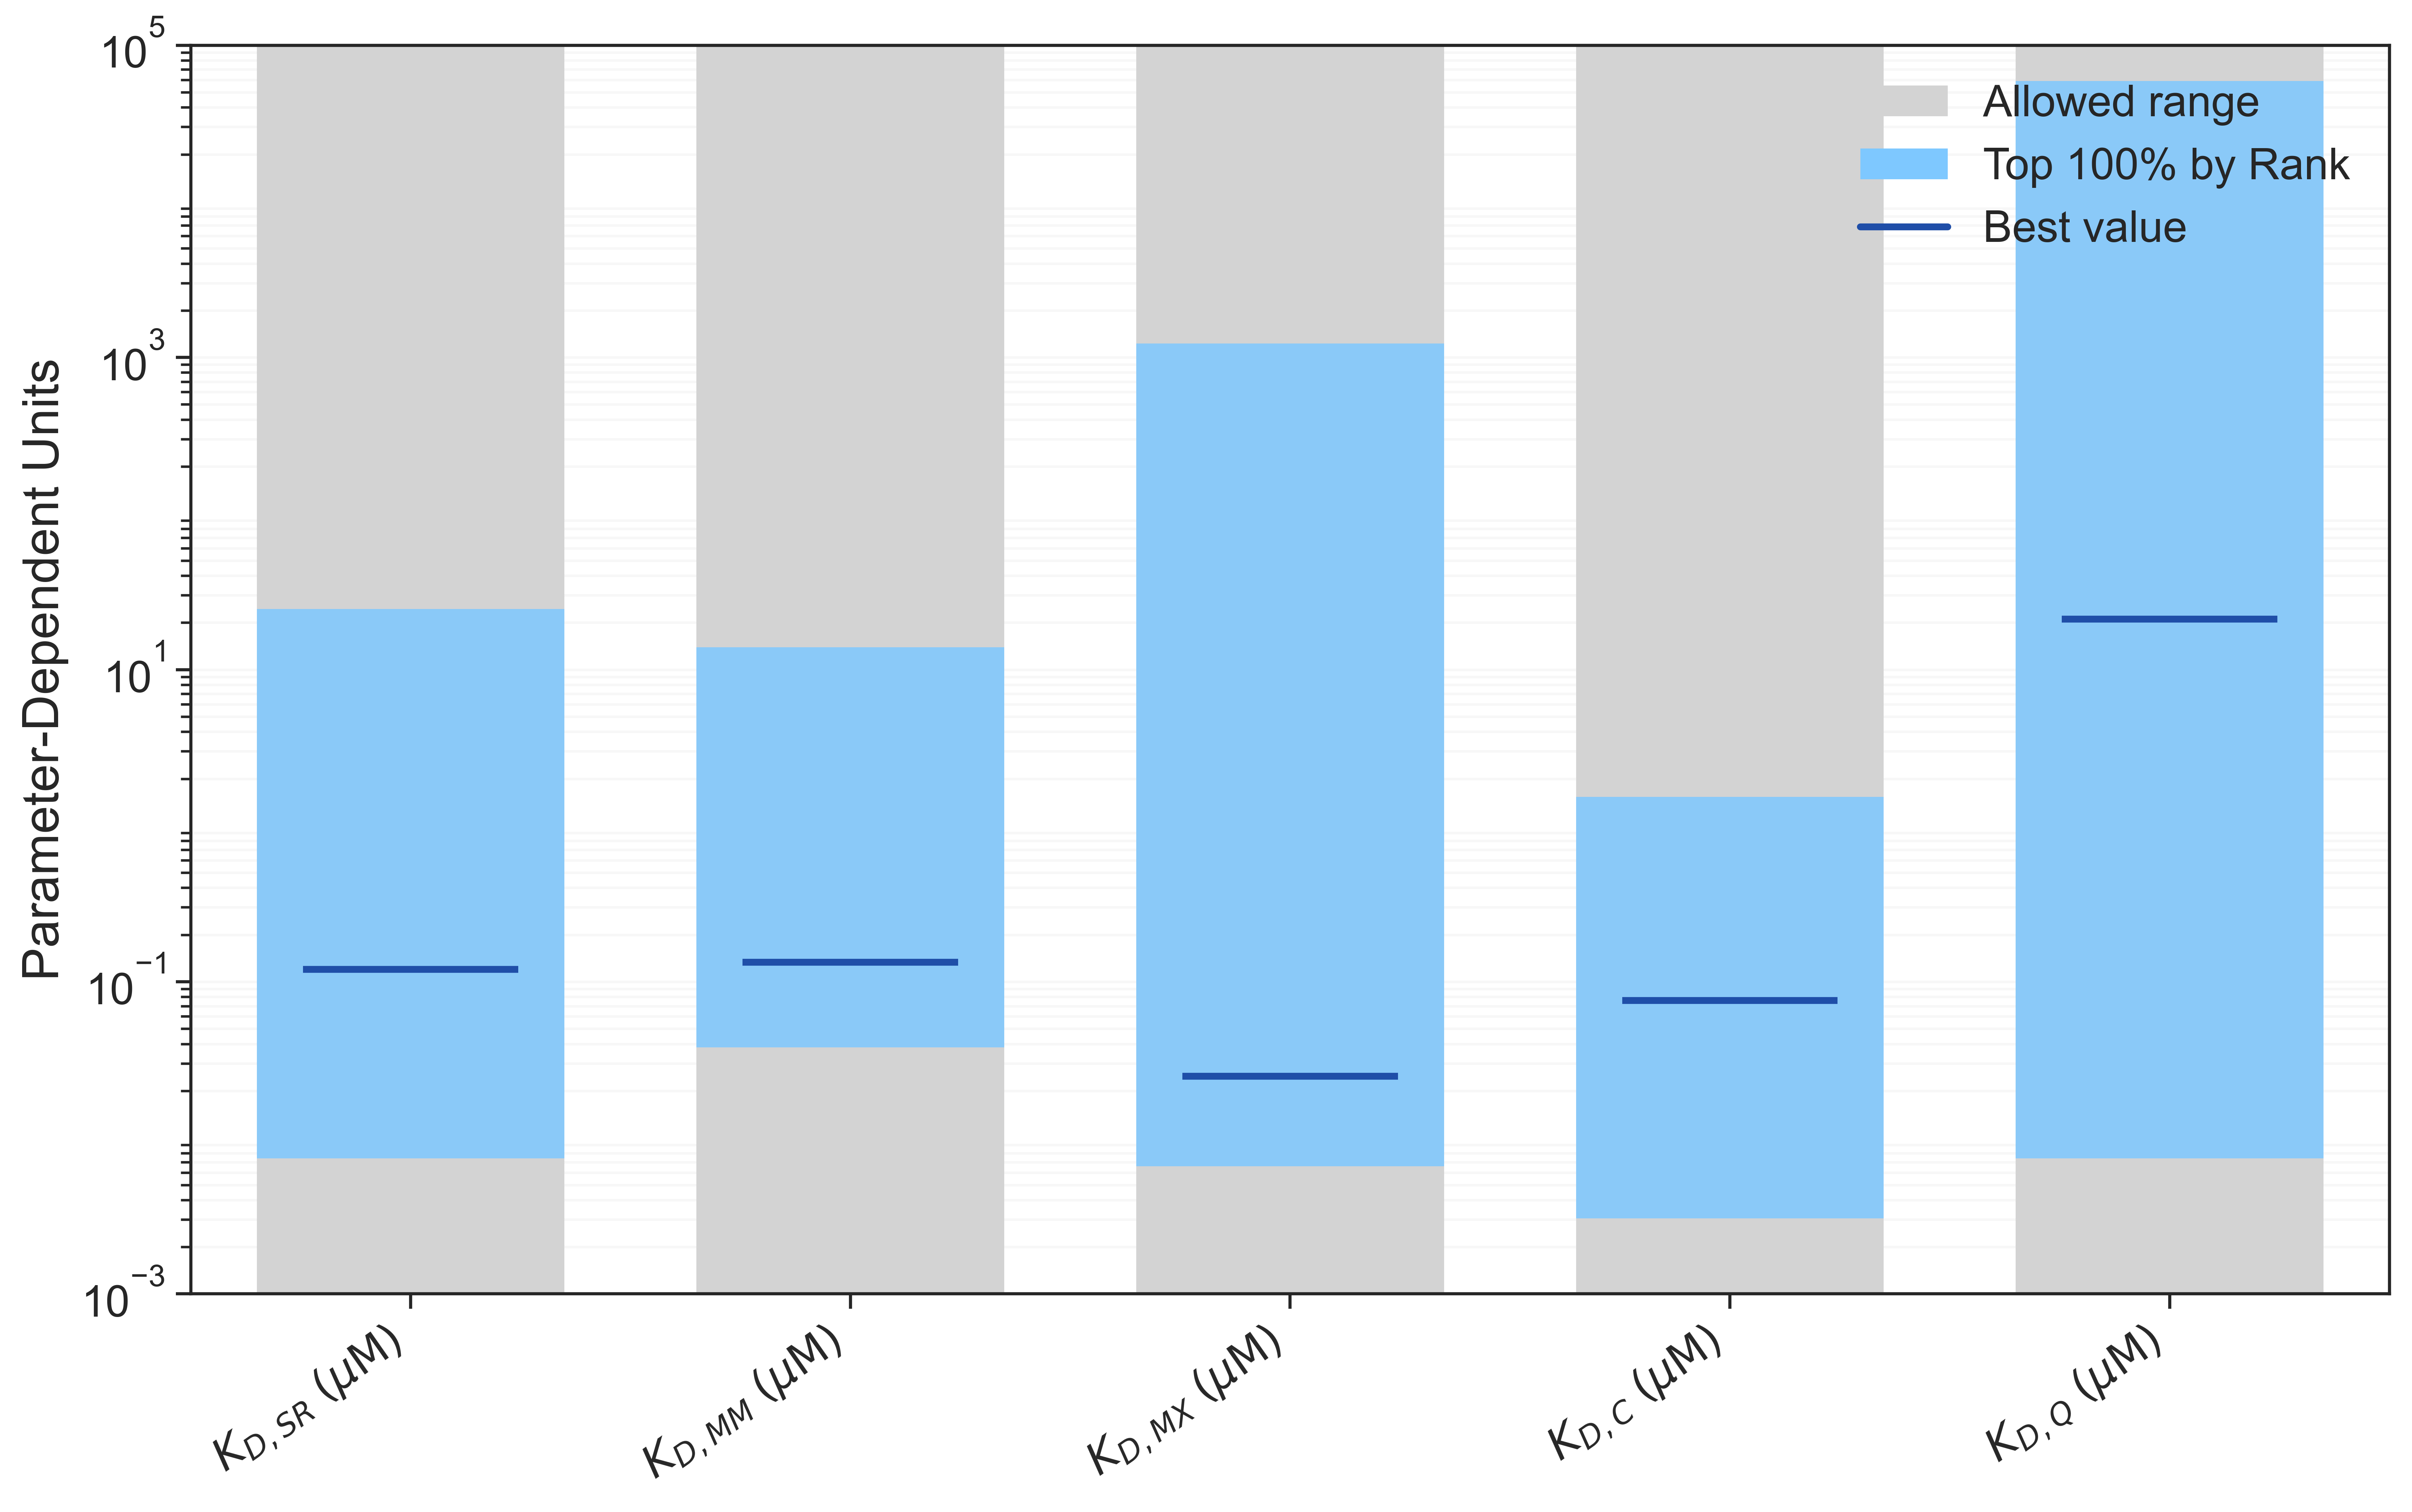

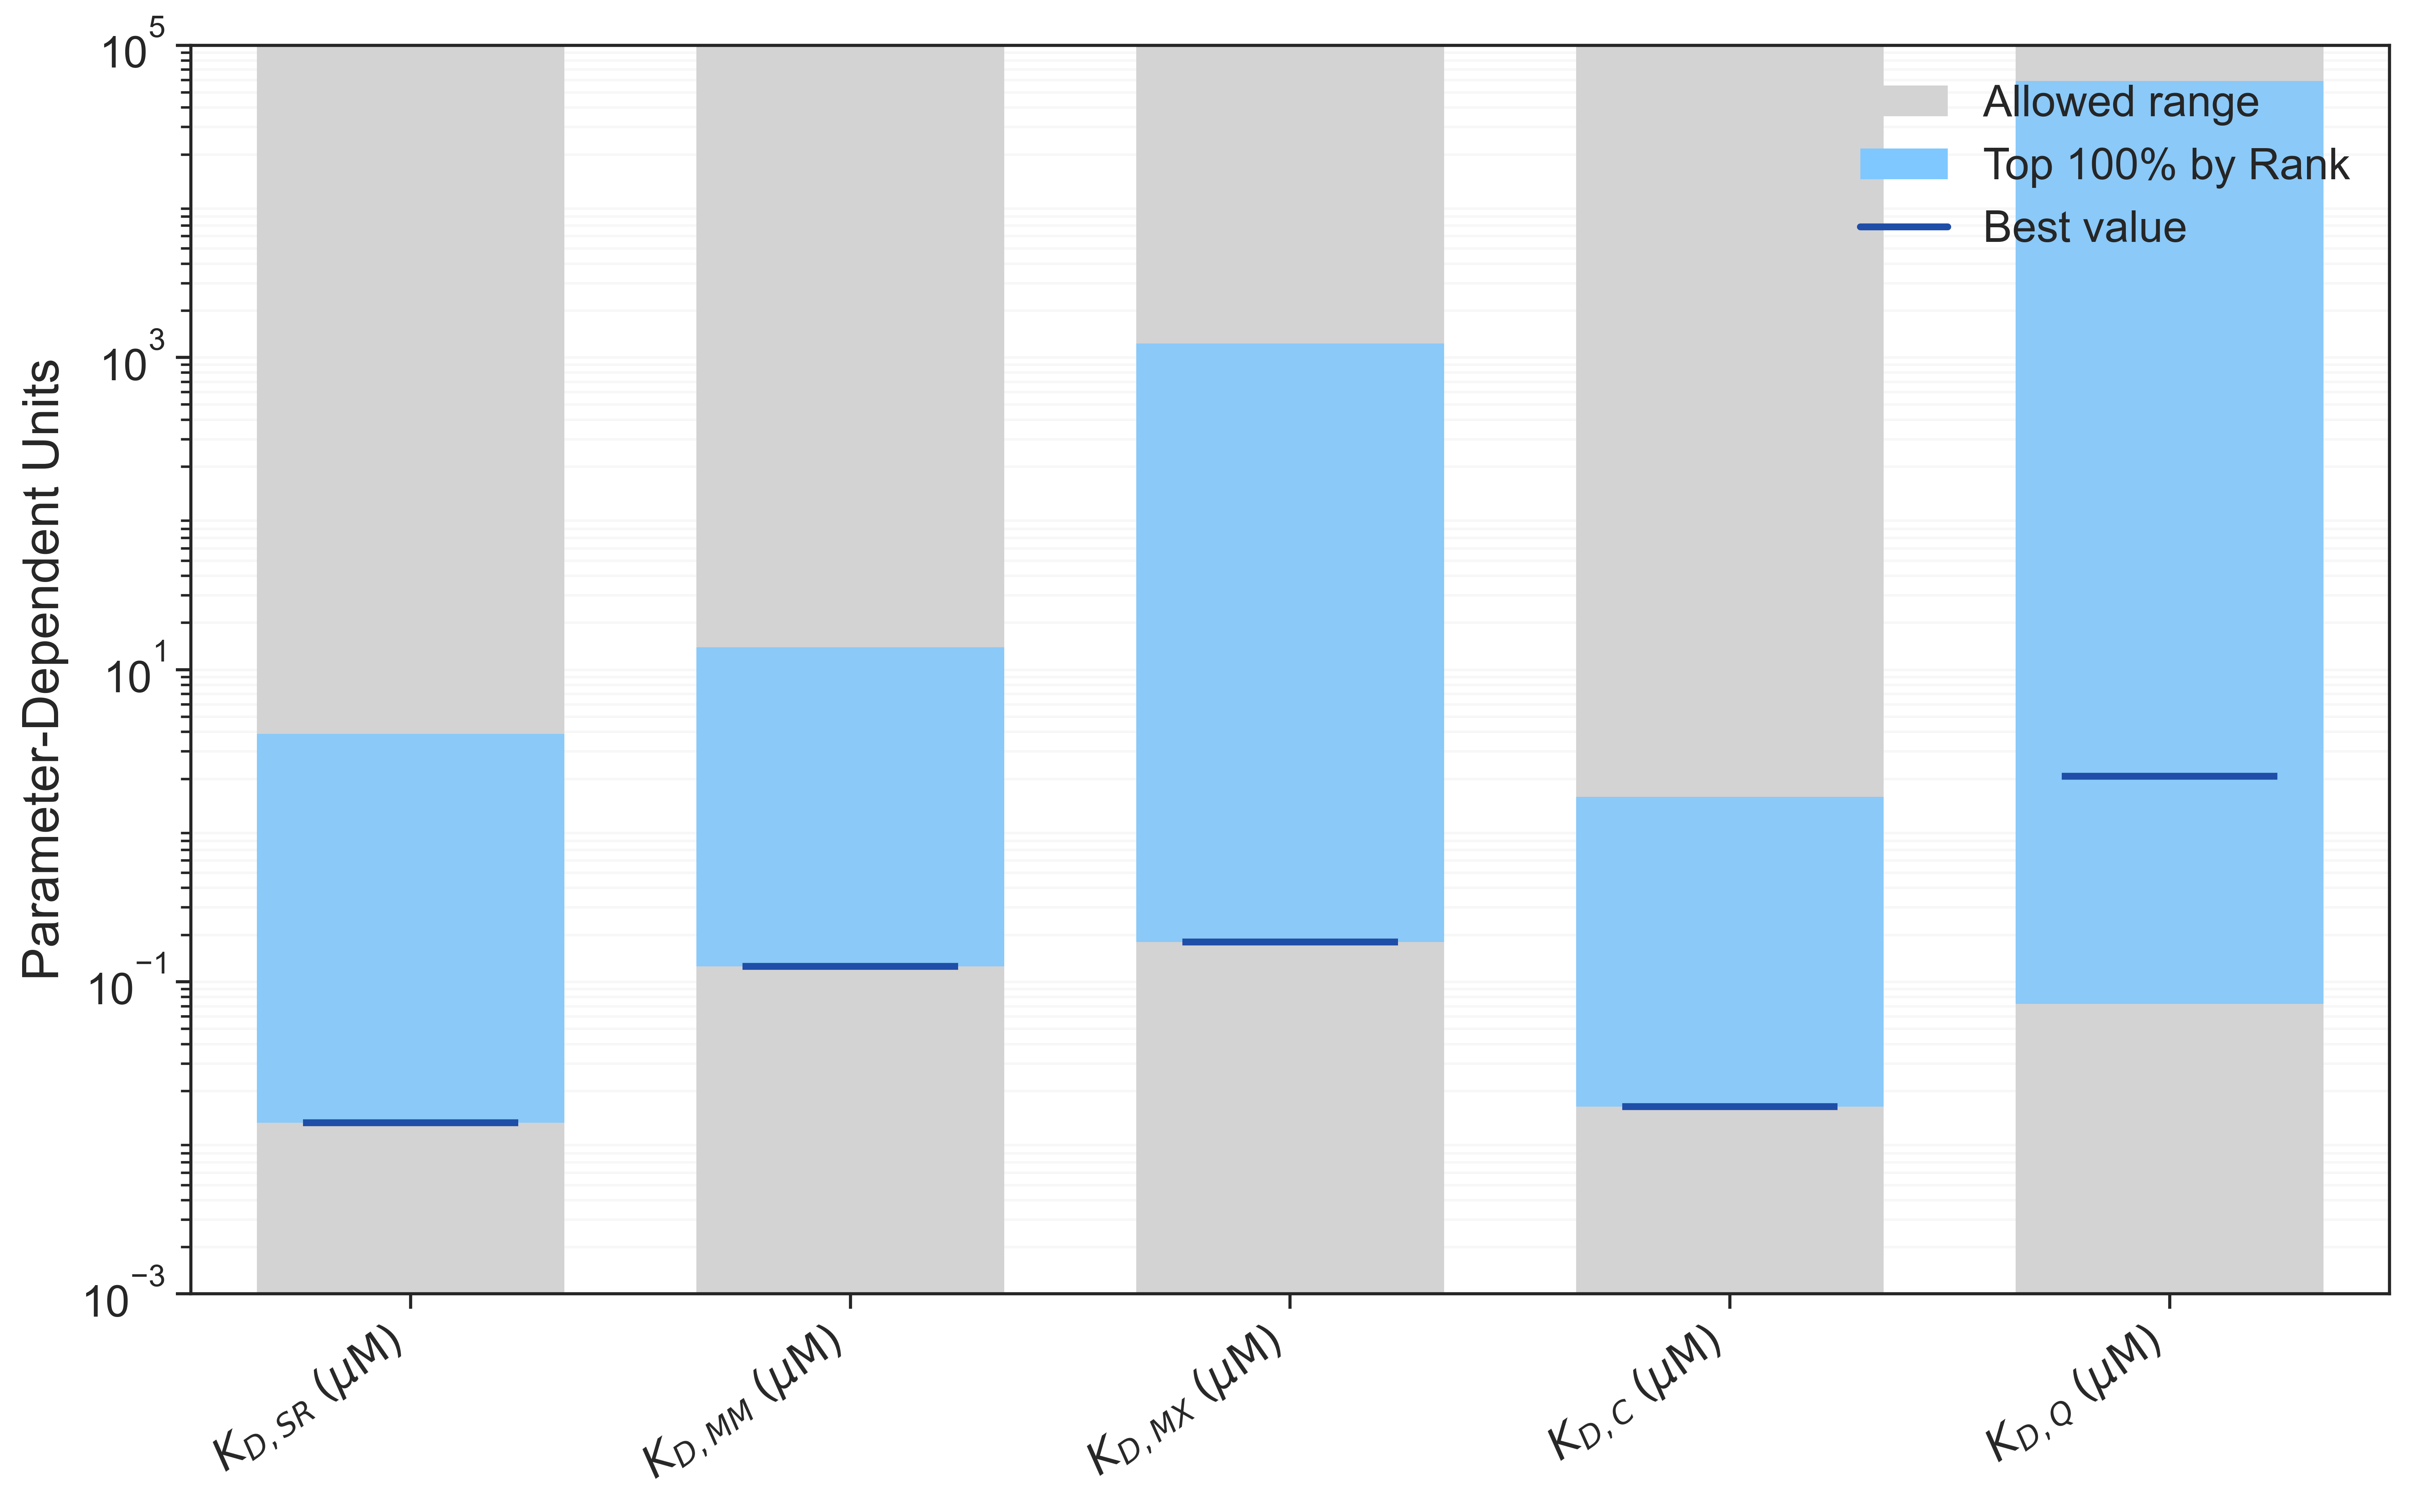

In [ ]:
# show the distirbution of KD values.
# add an explicit penalty to diffusion, by 1.1 or 1.05 slower. 
#all top solutions
inputFile = f"{dir}/Top11_solutions_withQ_parameters_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=100, save_path=f"{dir}/sensitivity_KD_Top11_{unique_id}.png",inputFile=inputFile)
#solutions with correct diffusion behavior
inputFile=f"{dir}/parameter_solutions_Dslows_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=100, save_path=f"{dir}/sensitivity_KD_Top11_Dslows_{unique_id}.png",inputFile=inputFile)


# distribution of sampled KD values from centroids

Total solutions loaded: 30
Using top 100% by Fitness -> 30 solutions.
p:  kDsr
best_row        kDsr      kDmm      kDmx       kDc        kDq
0  0.119761  0.128708  0.024859  0.090173  21.010966
p:  kDmm
best_row        kDsr      kDmm      kDmx       kDc        kDq
0  0.119761  0.128708  0.024859  0.090173  21.010966
p:  kDmx
best_row        kDsr      kDmm      kDmx       kDc        kDq
0  0.119761  0.128708  0.024859  0.090173  21.010966
p:  kDc
best_row        kDsr      kDmm      kDmx       kDc        kDq
0  0.119761  0.128708  0.024859  0.090173  21.010966
p:  kDq
best_row        kDsr      kDmm      kDmx       kDc        kDq
0  0.119761  0.128708  0.024859  0.090173  21.010966


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Centroid.png
Total solutions loaded: 10
Using top 100% by Fitness -> 10 solutions.
p:  kDsr
best_row        kDsr      kDmm      kDmx       kDc       kDq
0  0.012451  0.075034  0.356505  0.022916  2.094239
p:  kDmm
best_row        kDsr      kDmm      kDmx       kDc       kDq
0  0.012451  0.075034  0.356505  0.022916  2.094239
p:  kDmx
best_row        kDsr      kDmm      kDmx       kDc       kDq
0  0.012451  0.075034  0.356505  0.022916  2.094239
p:  kDc
best_row        kDsr      kDmm      kDmx       kDc       kDq
0  0.012451  0.075034  0.356505  0.022916  2.094239
p:  kDq
best_row        kDsr      kDmm      kDmx       kDc       kDq
0  0.012451  0.075034  0.356505  0.022916  2.094239


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2527: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Centroid_Dslows.png


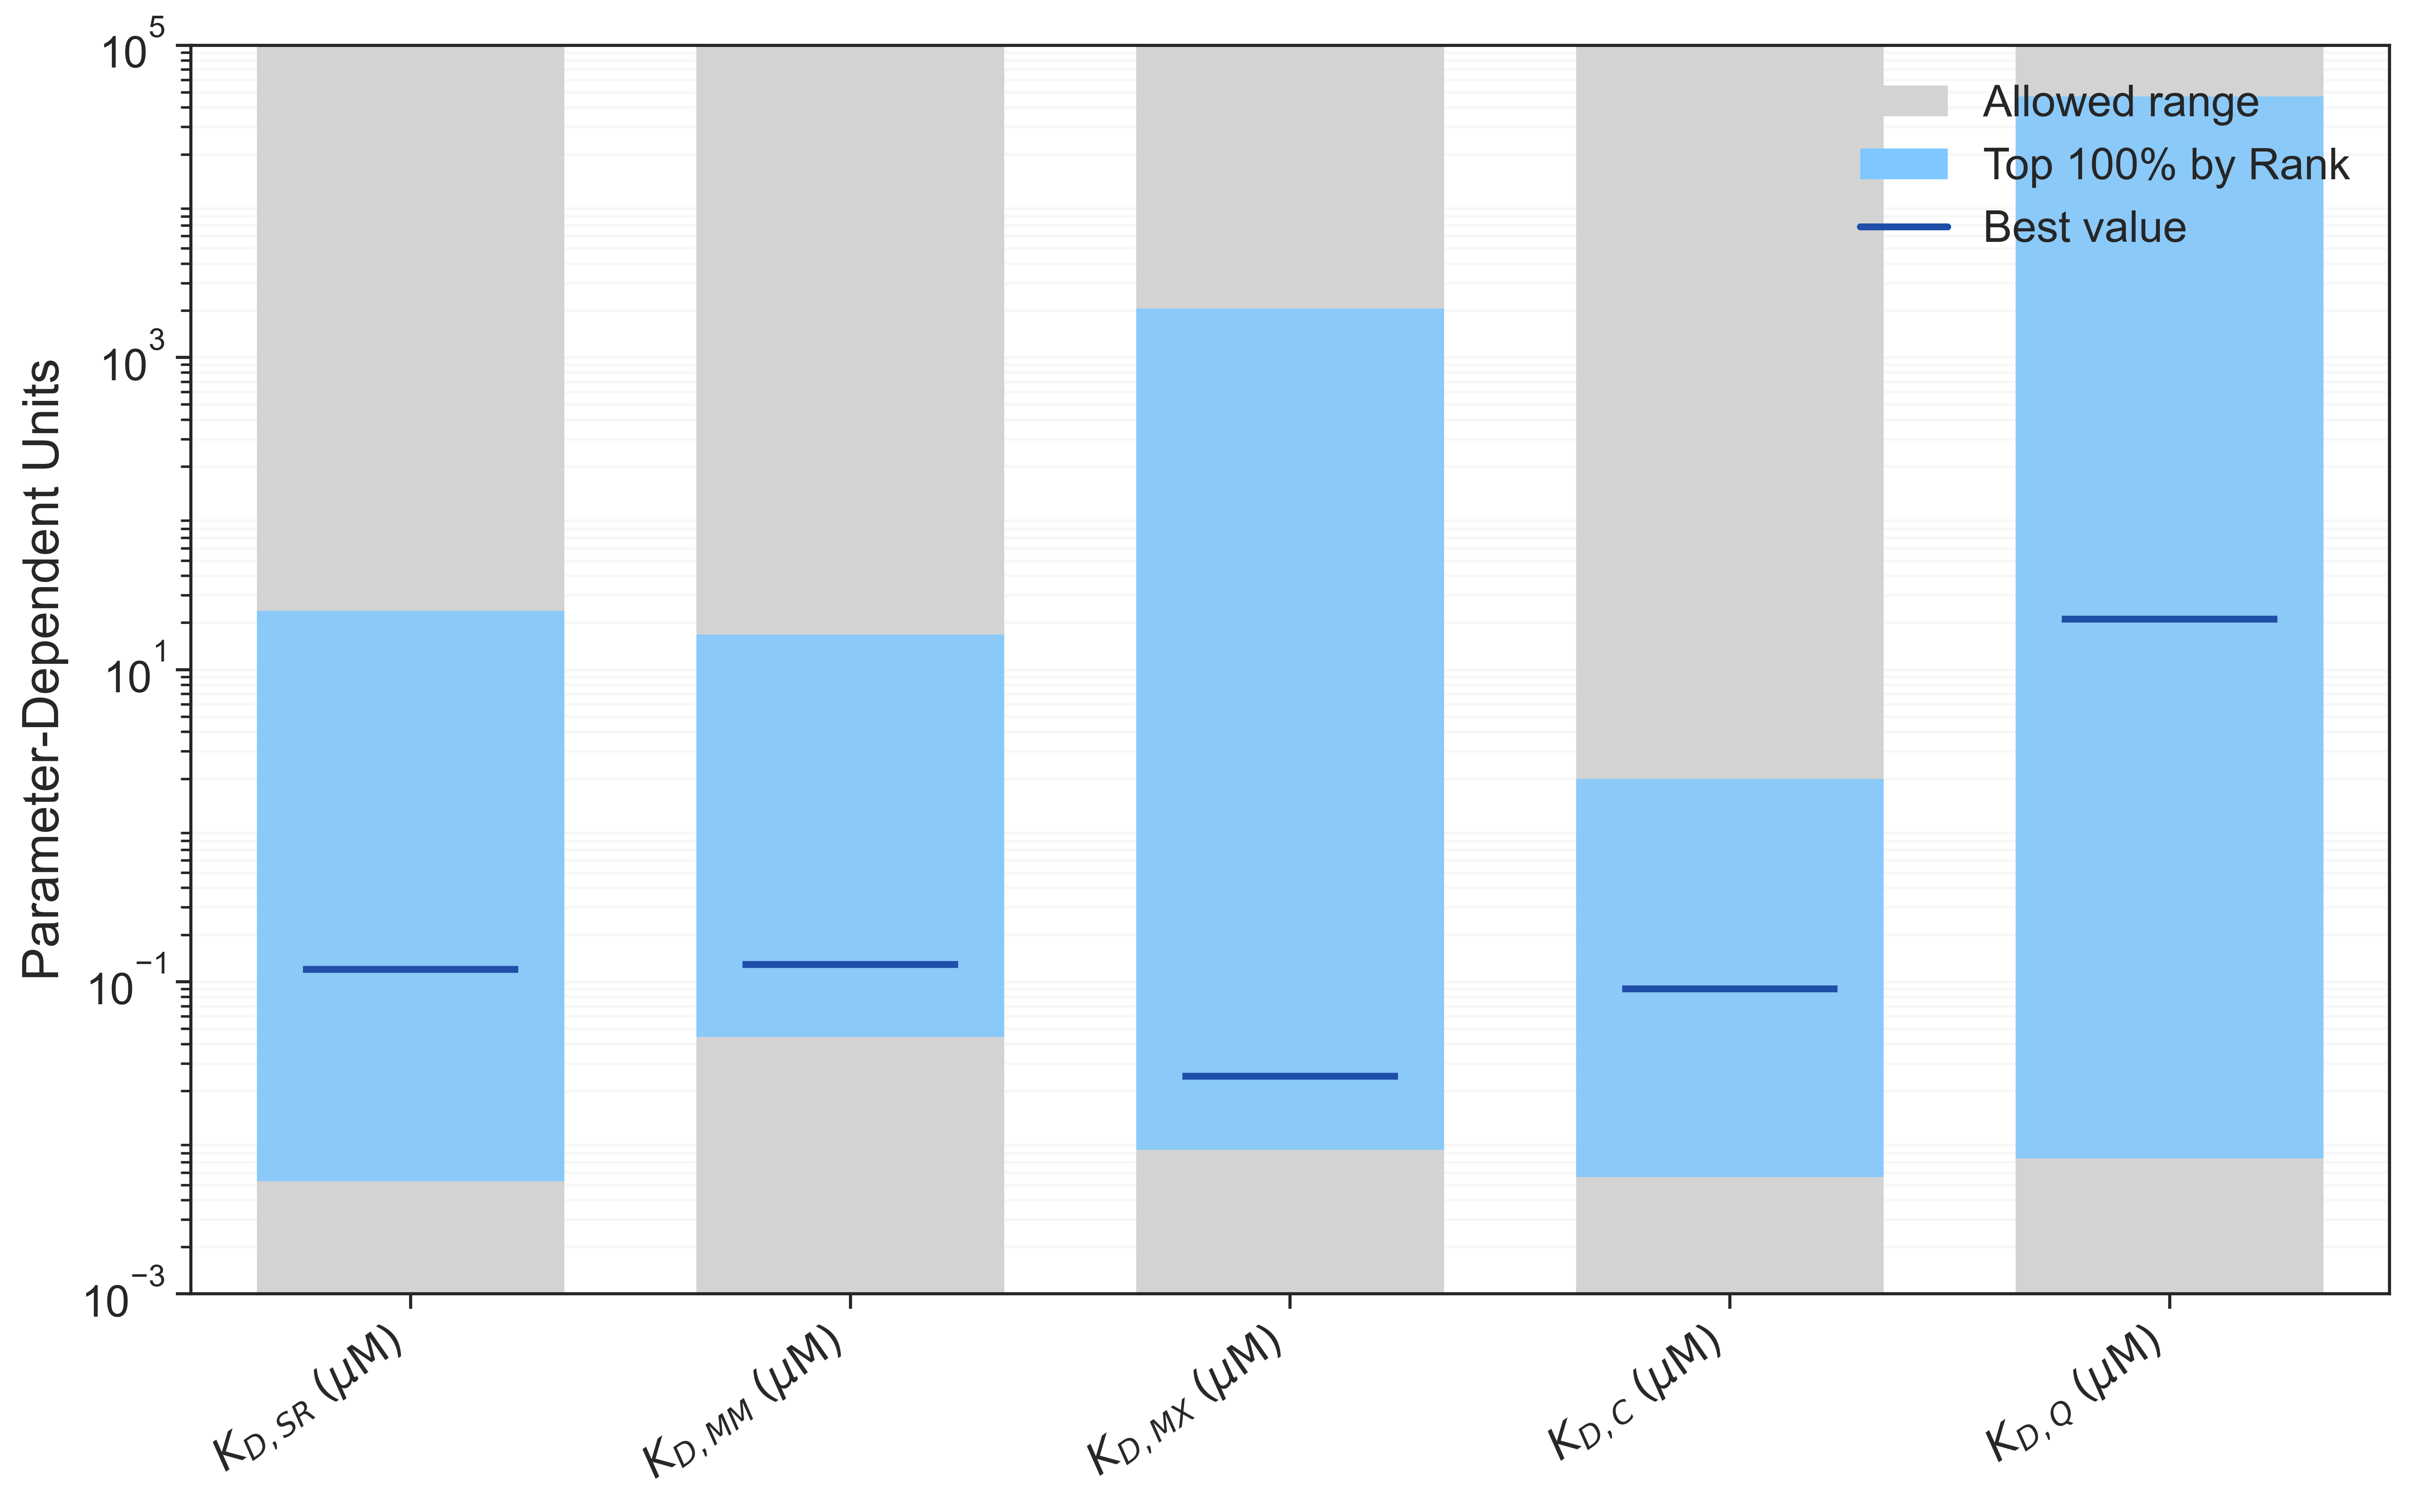

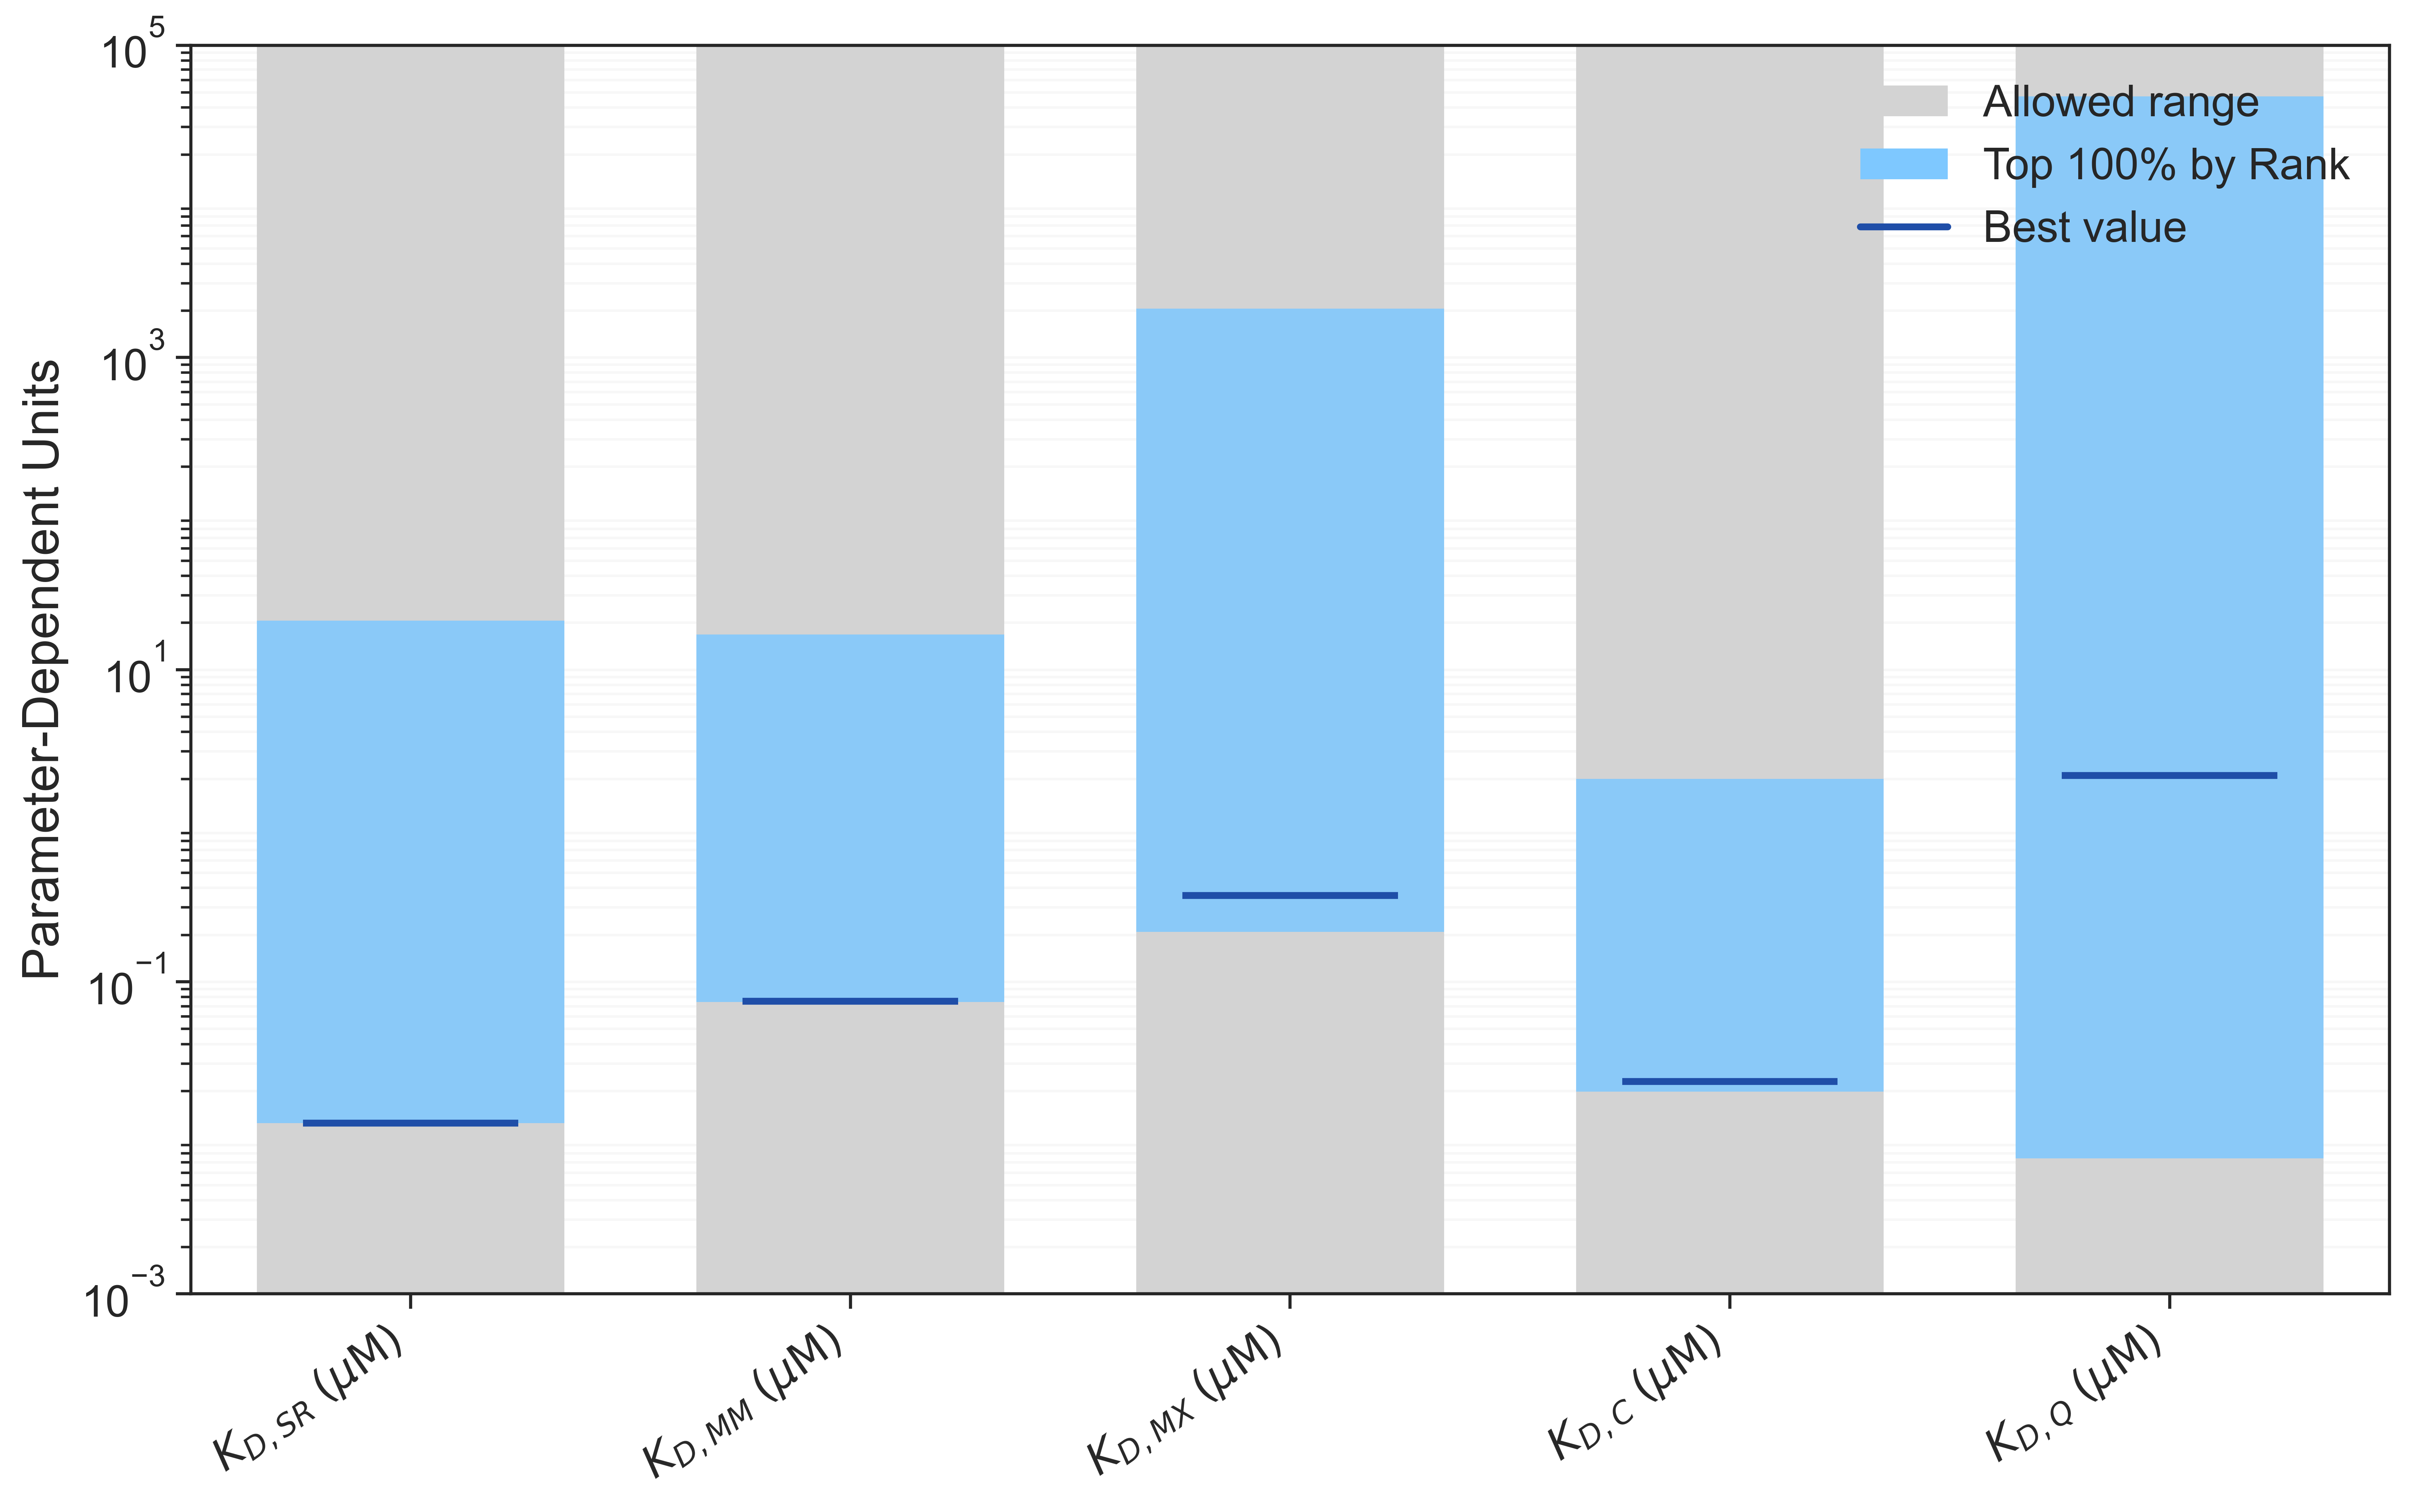

In [ ]:
# show the distirbution of KD values.
# add an explicit penalty to diffusion, by 1.1 or 1.05 slower. 
#all top solutions
inputFile = f"{dir}/Centroid_solutions_withQ_parameters_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=100, save_path=f"{dir}/sensitivity_KD_Centroid_{unique_id}.png",inputFile=inputFile)
#solutions with correct diffusion behavior
inputFile=f"{dir}/centroid_parameter_solutions_Dslows_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=100, save_path=f"{dir}/sensitivity_KD_Centroid_Dslows_{unique_id}.png",inputFile=inputFile)


# what happens if total munc13 is lowered to cluster density and diffusion

In [58]:
#first make sure you go back to the original candidate
candidate=selected_solutions[param_cols].iloc[whichRow].values

print(candidate)
print(selected_solutions.iloc[whichRow])
print('exp_metrics: ', exp_metrics.iloc[whichRow])
endo_candidate=list(candidate)
#change the munc13 concentration
endo_candidate[15]=endo_candidate[15]*0.1
#print(endo_candidate[15])
solOrig, solOrigPost=model.simulate(candidate)
sol, solPost=model.simulate(endo_candidate)

model.test_mass_conservation(sol)

[4.3140e+00 5.3834e-02 4.2487e+00 5.3393e-01 3.6803e-01 6.6286e-02
 1.3607e+00 2.1555e-02 1.8137e-02 3.7562e-02 2.8266e+00 5.1271e-04
 1.3557e-01 8.4171e-01 1.8945e+01 2.6940e-03 2.8242e+00 2.1563e-02
 8.9618e+01]
Rank         0.000000
Fitness     -2.295600
kfsr         4.314000
krsr         0.053834
kfmm         4.248700
krmm         0.533930
kfmx         0.368030
krmx         0.066286
kfc          1.360700
krc          0.021555
kfq          0.018137
krq          0.037562
eLoop        2.826600
eDF          0.000513
kfdd         0.135570
Sd           0.841710
stimUpSR    18.945000
S0           0.002694
R0           2.824200
X0           0.021563
Q0          89.618000
Name: 0, dtype: float64
exp_metrics:  tau56        1.940533e+01
tau56Post    1.940513e+01
densPre      2.147320e-02
densPost     2.152615e-02
stimFact     2.804829e+00
percClust    1.431625e-01
percCPost    5.116728e-02
percDimer    3.620489e-01
percDPost    6.199109e-01
SSval        7.208391e-07
SSvalPost    4.571377e-08


In [59]:
specieNames=['S','R','M','D','X','S2','MX','SX','M2X','DX','Q','SQ','S2Q2','M3X','M4X','M5X','M6X','D2X','D3X','DMX','DM2X','D2MX','D2M2X']
len(specieNames)
endoDF=pd.DataFrame([sol[:,-1], solOrig[:,-1]],columns=specieNames)
print(endoDF['D'])

0    0.000001
1    0.000081
Name: D, dtype: float64


In [60]:
percClusterTotalEndo, percClustMemEndo, percMemEndo, pMonoEndo, pDimerEndo, pMXEndo, pDXEndo=model.calc_percentages_cluster(sol)
percClusterTotalOrig, percClustMemOrig, percMemOrig, pMonoOrig, pDimerOrig, pMXOrig, pDXOrig=model.calc_percentages_cluster(solOrig)
memCopyMuncEndo =   model.calculate_munc13_on_membrane(sol[:,-1]*model.cellVolume*602)      
memCopyMuncOrig =   model.calculate_munc13_on_membrane(solOrig[:,-1]*model.cellVolume*602)
print('memcopies, endo, orig', memCopyMuncEndo, memCopyMuncOrig)
print('pmono', pMonoEndo, pMonoOrig)
print('pdimer, ', pDimerEndo, pDimerOrig)

memcopies, endo, orig 141.78112620427677 1130.338476853794
pmono 0.48669921917997655 0.4943115073584666
pdimer,  0.048527510634336864 0.36204889567931553


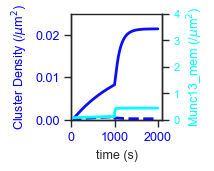

sizes pre stim, and sum:  [np.float64(0.48669921917997655), np.float64(0.048527510634336864), np.float64(0.4350720743690547)]
sizes POST stim, and sum:  [np.float64(0.4625098879844583), np.float64(0.23838140415684209), np.float64(0.297168231609252)]


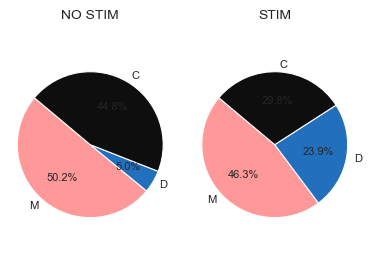

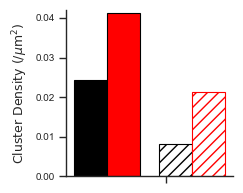

In [ ]:
model.plot_time_resolved_density(sol, solPost,f"ENDO_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"ENDO_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"ENDO_{unique_id}_{whichRow}", whichExp='WT')

In [62]:
#plot diffusion, compare with WT overexpressed
[metricsWTOrig,metricsC2AOrig, metricsDOrig]=model.compute_all_metrics(candidate)
[metricsWTEndo,metricsC2AEndo, metricsDEndo]=model.compute_all_metrics(endo_candidate)

exp_endo_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_endo_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_endo_metrics = pd.DataFrame([metricsD], columns = colD)


DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 1130.338476853794. M 440.893343263411. D 204.57504774786398. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 3170.4058996111894. M 966.2960552513424. D 982.6662146442698. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 818.0312594347229. M 542.6242478110887. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 2663.914464457513. M 2416.1733983724625. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 141.7811

DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 141.78112620427677. M 57.43801735621268. D 3.439719993377259. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 542.115805394215. M 247.7849167406576. D 64.61513599273631. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 83.64012639804692. M 65.80205259307144. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 489.29519810928343. M 349.86364673802643. D 0.0. 


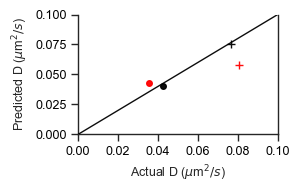

In [ ]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(endo_candidate)
exp_endo_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_endo_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_endo_metrics = pd.DataFrame([metricsD], columns = colD)

fig, ax = plt.subplots(figsize=(3, 2))
D=D_endo_metrics['D'].iloc[0]
Dpost=D_endo_metrics['Dpost'].iloc[0]
DC2A=D_endo_metrics['C2AD'].iloc[0]
DC2Apost=D_endo_metrics['C2ADpost'].iloc[0]
ax.plot(model.D_exp_pre,D, markersize=4, marker='o', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_post,Dpost, markersize=4, marker='o', color='red', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_pre,DC2A, markersize=6, marker='+', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_post,DC2Apost, markersize=6, marker='+', color='red', alpha=0.95, zorder=3)
ax.plot(np.arange(0, 10)*0.1,np.arange(0, 10)*0.1, linewidth=1, ls='-', color='black', alpha=0.95, zorder=3)

ax.set_xlim(left=0, right=0.1)
ax.set_ylim(bottom=0, top=0.1)
ax.set_xlabel("Actual D ($\\mu$m$^2/s$)", fontsize=9)
ax.set_ylabel("Predicted D ($\\mu$m$^2/s$)", fontsize=9)
ax.tick_params(axis='both',labelcolor='black', labelsize=9)
#ax.set_xticks([0, 1000,2000])
# Get rid of bound box on the top.
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Diffusion_ENDO_{unique_id}_{whichRow}.png",dpi=300)
plt.show()

In [64]:
print(D_endo_metrics['D'].iloc[0])


0.04050075356353621


In [65]:
print(D_metrics['D'].iloc[whichRow])

0.04864296624012342


D, D endo 0.04864296624012342 0.04050075356353621


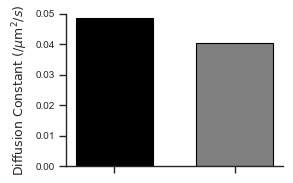

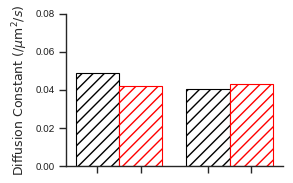

In [ ]:
#make a bar plot of diffusion following lower
fig, ax = plt.subplots(figsize=(3,2))
print('D, D endo',D_metrics['D'].iloc[whichRow], D_endo_metrics['D'].iloc[0])
bar_width=0.18

fontsize=9
gap=0.1
centers=[0.9, 0.9+bar_width+gap]
ax.bar(0.9,  D_metrics['D'].iloc[whichRow],  width=bar_width,  capsize=4,
            color='black',   edgecolor='black', label='Exp (NO STIM)')
ax.bar(0.9+bar_width+gap, D_endo_metrics['D'].iloc[0], width=bar_width, capsize=4,
            color='gray', edgecolor='black', label='Exp (STIM)')
# Axes/labels
ax.set_ylabel(r"$\mathrm{Diffusion\ Constant}\ (/\mu\mathrm{m}^2/s)$", fontsize=fontsize)
ax.set_xticks(centers)
ax.set_xticklabels([], fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize * 0.8)
ax.set_ylim(bottom=0, top=0.05)

# Adjust layout to fit
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
dpi=300
fig.savefig(f"{dir}/diffusion_WT_vs_endogenousGray.png", dpi=dpi) 

model.plot_diffusion_as_barplot(D_metrics['D'].iloc[whichRow], D_metrics['Dpost'].iloc[whichRow],D_endo_metrics['D'].iloc[0], D_endo_metrics['Dpost'].iloc[0], fileStr=f"{unique_id}_ENDO_both")

In [67]:
print(exp_endo_metrics)
print(exp_metrics)

       tau56  tau56Post   densPre  densPost  stimFact  percClust  percCPost  \
0  19.098179    19.4048  0.008185  0.021377  3.823611   0.435072   0.297168   

   percDimer  percDPost     SSval  SSvalPost  
0   0.048528   0.238381  0.001553   0.000036  
        tau56  tau56Post   densPre  densPost  stimFact  percClust  percCPost  \
0    5.128710   5.128718  0.020277  0.020297  3.197548   0.177704   0.055631   
1   19.804771  19.804827  0.021321  0.022539  2.786261   0.212796   0.080734   
2   19.405334  19.405134  0.021473  0.021526  2.804829   0.143162   0.051167   
3   18.491926  18.524892  0.022611  0.024096  2.947060   0.142404   0.051495   
4   17.909299  17.930790  0.019943  0.021737  2.906498   0.141567   0.053089   
5   13.992799  13.996024  0.022371  0.022864  2.887547   0.003382   0.001197   
6   16.997583  16.997786  0.024230  0.024360  2.265058   0.123180   0.054673   
7   10.605974  10.606095  0.022680  0.022765  2.848641   0.253133   0.089194   
8   11.690881  11.698144  0

# make plots for lipid impairment

In [68]:
#now lower the kfsr, and also set the stimUp to 1. 
pip_candidate=list(candidate)
pip_candidate[0]=pip_candidate[0]*0.05 #kfsr
pip_candidate[14]=1.0 #stimUpSR
#R0 is [16]
#pip_candidate[16]=pip_candidate[16]*0.2

sol, solPost=model.simulate(pip_candidate)

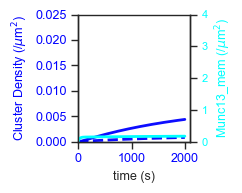

sizes pre stim, and sum:  [np.float64(0.8688770836876938), np.float64(0.01341271491135606), np.float64(0.0999415479076262)]
sizes POST stim, and sum:  [np.float64(0.8084986441120048), np.float64(0.012494632414498587), np.float64(0.15509600148654257)]


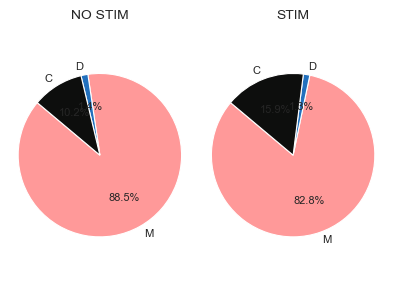

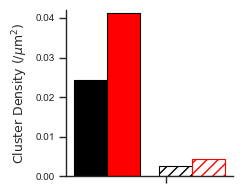

In [ ]:
model.plot_time_resolved_density(sol, solPost,f"dPIP_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"dPIP_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"dPIP_{unique_id}_{whichRow}", whichExp='WT')

DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 197.21540940396733. M 34.81695368138345. D 1.2637307404756548. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 211.46912105017714. M 34.7209679059589. D 1.2624960015335407. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 181.01405298827478. M 36.86591520537047. D 0.0. 
DtM, 0.08. DtX 0.001. DtD 0.025
DtM6X, 0.0009302325581395349. DtD3X 0.0008928571428571428. DtMX 0.0009876543209876543. DtDX 0.0009615384615384616
memMunc 181.01461724305287. M 36.86597723478765. D 0.0. 


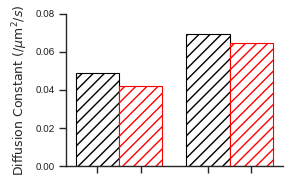

In [ ]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(pip_candidate)
exp_pip_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_pip_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_pip_metrics = pd.DataFrame([metricsD], columns = colD)

model.plot_diffusion_as_barplot(D_metrics['D'].iloc[whichRow], D_metrics['Dpost'].iloc[whichRow],D_pip_metrics['D'].iloc[0], D_pip_metrics['Dpost'].iloc[0], fileStr=f"{unique_id}_dPIP")